GROUP 40 -- PROJECT 2

In [62]:
"""Importing files"""
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
%cd drive/MyDrive/Data_Sets/

[Errno 2] No such file or directory: 'drive/MyDrive/Data_Sets/'
/content/drive/MyDrive/Data_Sets


In [64]:
import os

In [65]:
os.listdir()

['acc_walking_data_2',
 'acc_walking_data_6',
 'acc_walking_data_14',
 'acc_walking_data_8',
 'acc_walking_data_3',
 'acc_walking_data_7',
 'acc_walking_data_5',
 'acc_walking_data_4',
 'acc_walking_data_15',
 'acc_walking_data_9',
 'acc_walking_data_10',
 'acc_running_data_5',
 'acc_walking_data_1',
 'acc_walking_data_11',
 'acc_running_data_9',
 'acc_running_data_8',
 'acc_running_data_7',
 'acc_walking_data_12',
 'acc_walking_data_13',
 'acc_running_data_6',
 'acc_running_data_11',
 'acc_running_data_13',
 'acc_running_data_12',
 'acc_running_data_10',
 'acc_running_data_3',
 'acc_running_data_1',
 'acc_running_data_2',
 'acc_running_data_14',
 'acc_running_data_15',
 'acc_running_data_4',
 'acc_climbingup_data_8',
 'acc_climbingup_data_4',
 'acc_climbingup_data_5',
 'acc_climbingup_data_2',
 'acc_climbingup_data_3',
 'acc_climbingup_data_14',
 'acc_climbingup_data_7',
 'acc_climbingup_data_6',
 'acc_climbingup_data_15',
 'acc_climbingup_data_9',
 'acc_climbingdown_data_9',
 'acc_cl

In [66]:
!pip install ts2vg cairocffi igraph
!pip install pycairo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycairo-1.23.0.tar.gz (344 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly


In [67]:
"""Importing functions and libraries"""
from ts2vg import NaturalVG, HorizontalVG
import numpy as np
import igraph
import cairocffi
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
"""specifying the table parameters"""
col = ["Method", "Subject", "Accelerometer Axis", "Average Degree",
            "Network Diameter", "Average Path Length", "Activity","Sensor"]
final_table = pd.DataFrame(columns = col)
activities = ["walking", "running", "climbingup", "climbingdown"]
subjects = list(range(1, 16))
axis = list("xyz")
sensors = ["chest", "forearm", "head", "shin", "thigh", "upperarm", "waist"]
methods = [NaturalVG, HorizontalVG]

In [69]:
"""Appending our finding to final table"""
for subject in subjects:
  for activity in activities:
    for sensor in sensors:
      try:
       foldername = "acc_"+activity+"_data_"+str(subject)
       filename = "acc_"+activity+"_"+sensor+".csv"
       print(foldername,'-',sensor)
       task_1 = pd.read_csv(foldername+"/"+filename)
       for method in methods:
         for ax in axis:            
             g = method()
             g.build(task_1["attr_"+ax][1000:2024])
             ig = g.as_igraph()
             result = [method.__name__, subject, ax.upper(), np.mean(ig.degree()), 
                     ig.diameter(), ig.average_path_length(), activity,sensor]
             new_d = dict(zip(col, result))
             final_table = final_table.append(new_d, ignore_index=True)
      except Exception:
          continue

acc_walking_data_1 - chest
acc_walking_data_1 - forearm
acc_walking_data_1 - head
acc_walking_data_1 - shin
acc_walking_data_1 - thigh
acc_walking_data_1 - upperarm
acc_walking_data_1 - waist
acc_running_data_1 - chest
acc_running_data_1 - forearm
acc_running_data_1 - head
acc_running_data_1 - shin
acc_running_data_1 - thigh
acc_running_data_1 - upperarm
acc_running_data_1 - waist
acc_climbingup_data_1 - chest
acc_climbingup_data_1 - forearm
acc_climbingup_data_1 - head
acc_climbingup_data_1 - shin
acc_climbingup_data_1 - thigh
acc_climbingup_data_1 - upperarm
acc_climbingup_data_1 - waist
acc_climbingdown_data_1 - chest
acc_climbingdown_data_1 - forearm
acc_climbingdown_data_1 - head
acc_climbingdown_data_1 - shin
acc_climbingdown_data_1 - thigh
acc_climbingdown_data_1 - upperarm
acc_climbingdown_data_1 - waist
acc_walking_data_2 - chest
acc_walking_data_2 - forearm
acc_walking_data_2 - head
acc_walking_data_2 - shin
acc_walking_data_2 - thigh
acc_walking_data_2 - upperarm
acc_walking

In [70]:
"""tabulated final table"""
final_table

Method Subject Accelerometer Axis  Average Degree  \
0        NaturalVG       1                  X       11.451172   
1        NaturalVG       1                  Y       11.986328   
2        NaturalVG       1                  Z        8.570312   
3     HorizontalVG       1                  X        3.958984   
4     HorizontalVG       1                  Y        3.951172   
...            ...     ...                ...             ...   
2425     NaturalVG      15                  Y        9.677734   
2426     NaturalVG      15                  Z        8.652344   
2427  HorizontalVG      15                  X        3.917969   
2428  HorizontalVG      15                  Y        3.933594   
2429  HorizontalVG      15                  Z        3.962891   

     Network Diameter  Average Path Length      Activity Sensor  
0                  10             4.441492       walking  chest  
1                   9             4.241050       walking  chest  
2                  10             4.897722       walking  chest  
3                  26            11.578024       walking  chest  
4                  22            10.666252       walking  chest  
...               ...                  ...           ...    ...  
2425               14             5.287115  climbingdown  waist  
2426               10             4.865105  climbingdown  waist  
2427               40            16.785202  climbingdown  waist  
2428               31            12.079689  climbingdown  waist  
2429               29            11.314474  climbingdown  waist  

[2430 rows x 8 columns]

In [71]:
"""function for scatter plot which input the values"""
def scatterplot(x,y,colors, title,data):
  plt.title(title)
  plt.scatter(data[x], data[y], c = colors)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

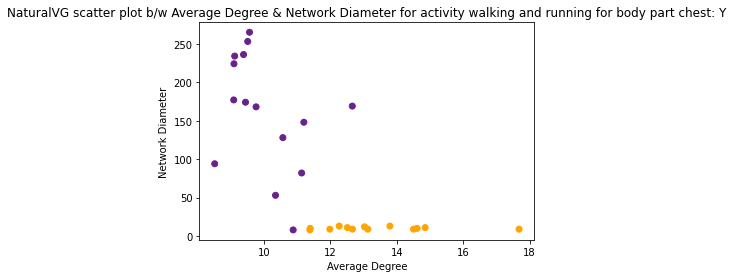

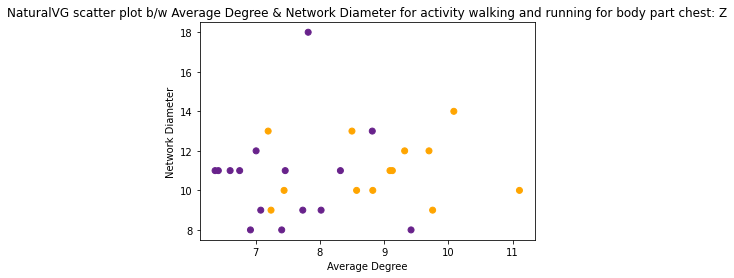

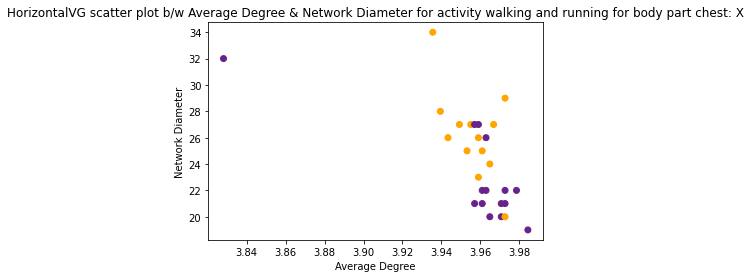

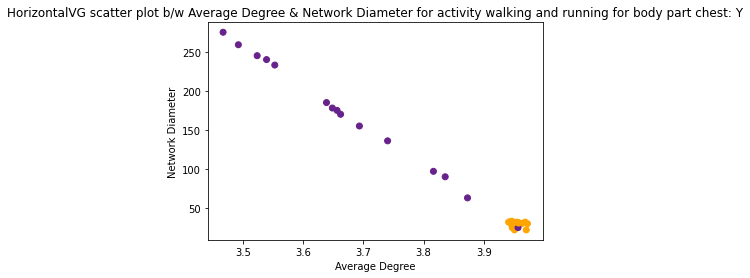

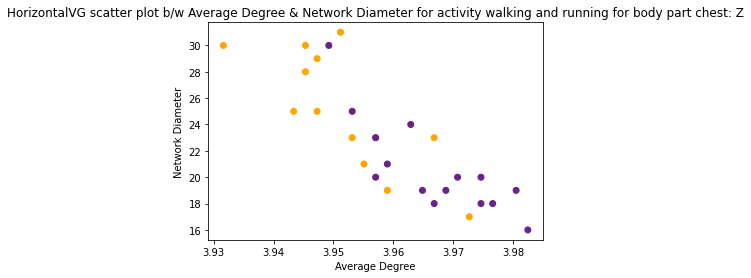

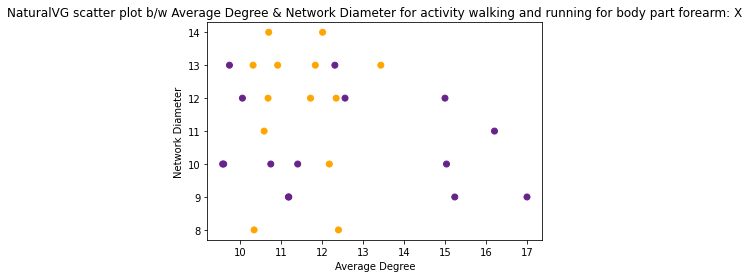

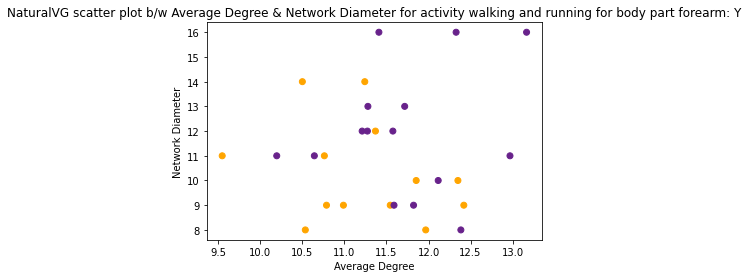

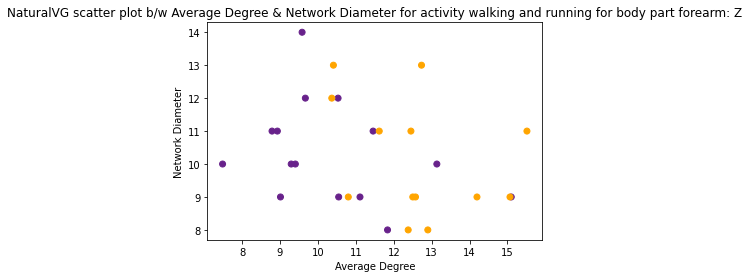

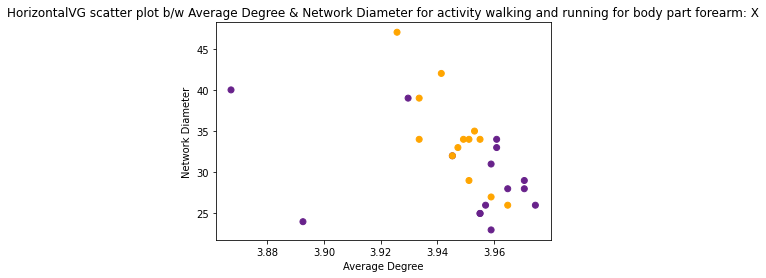

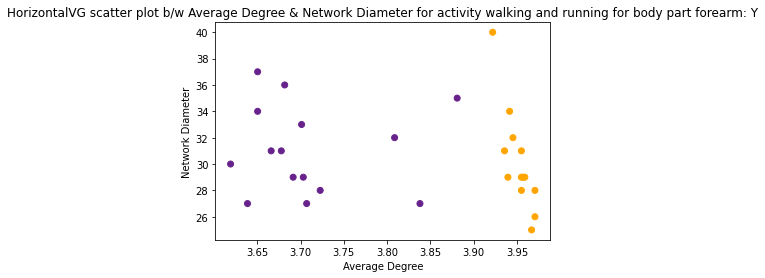

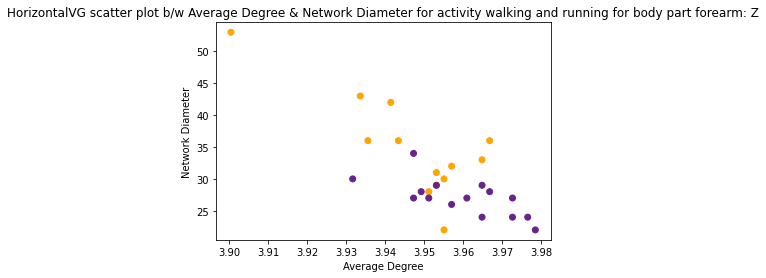

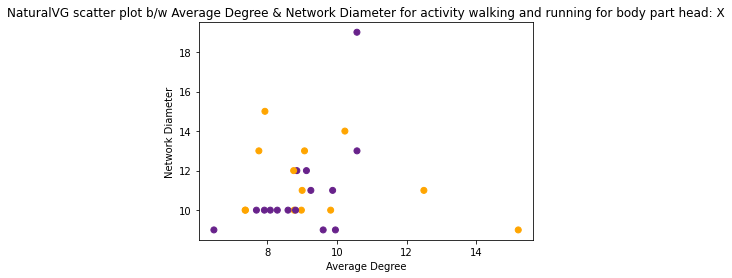

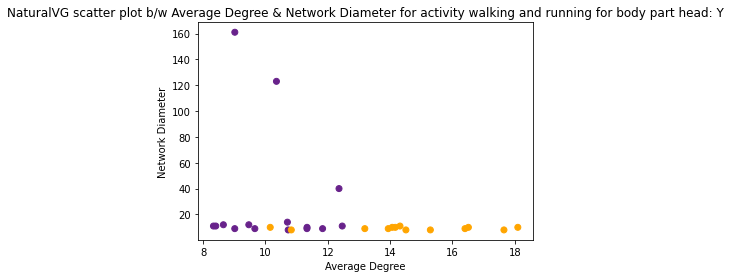

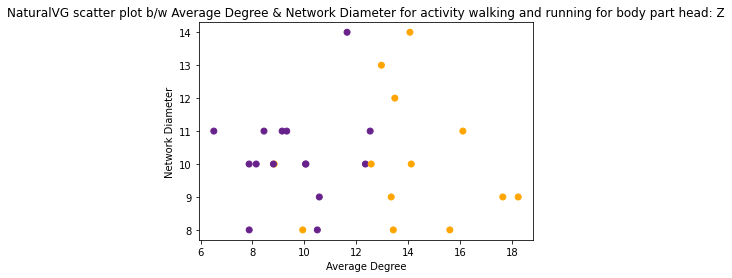

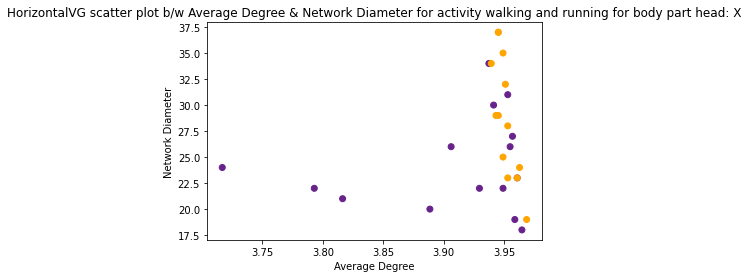

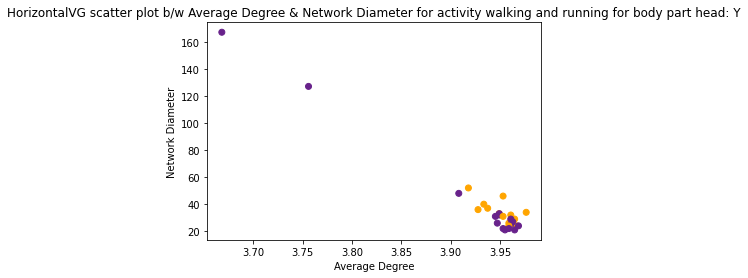

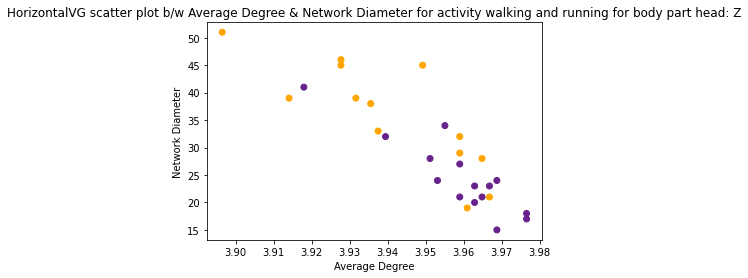

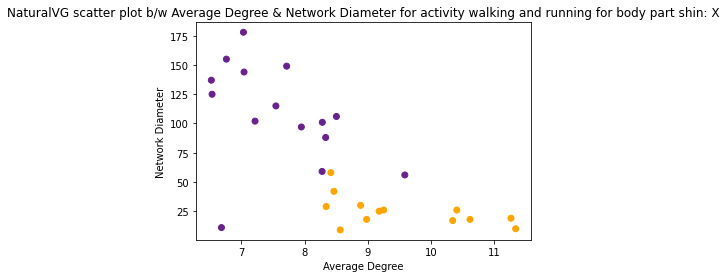

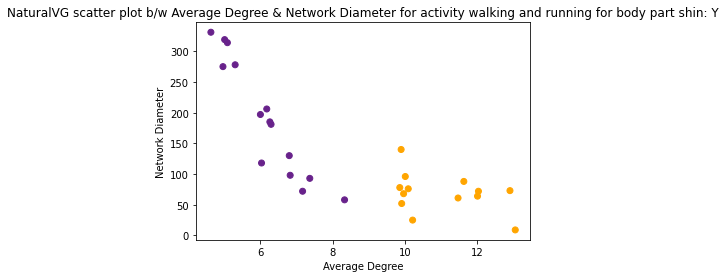

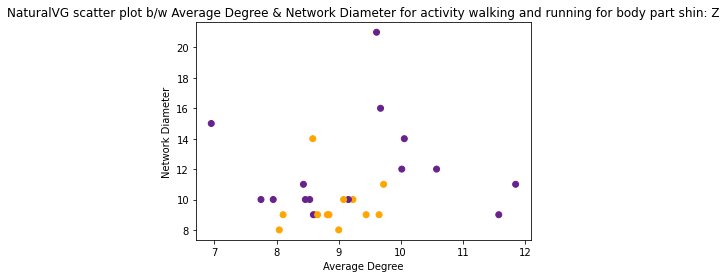

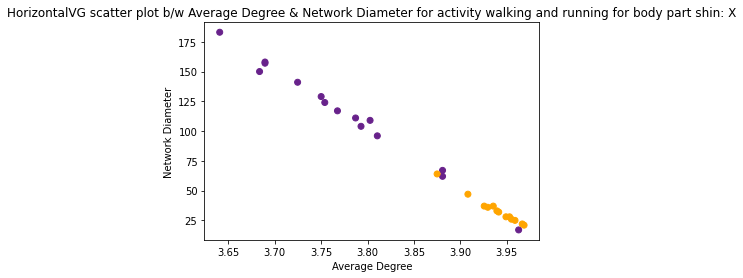

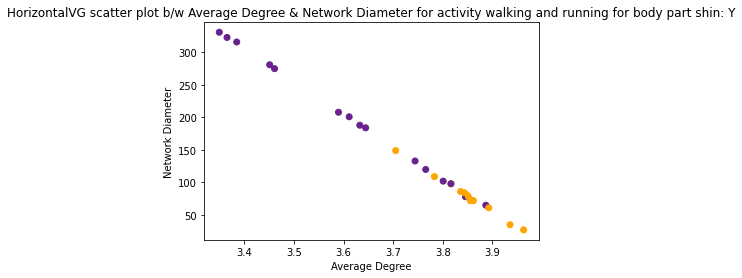

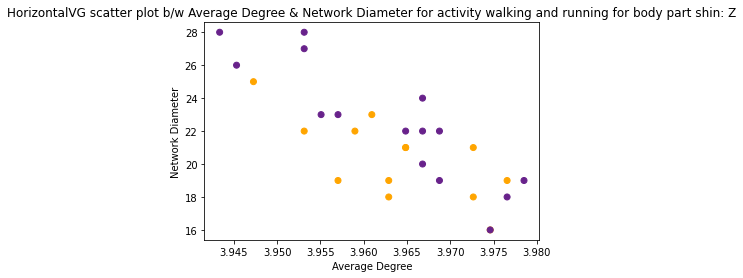

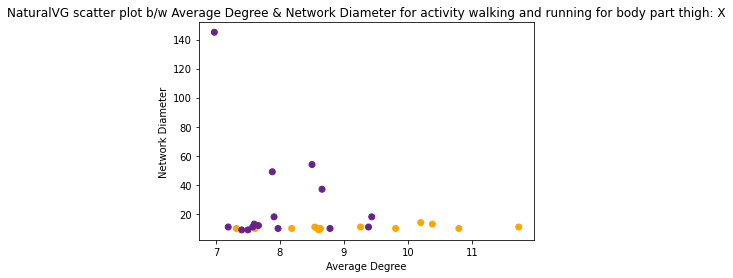

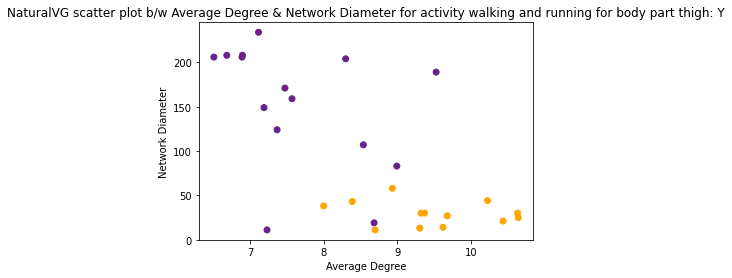

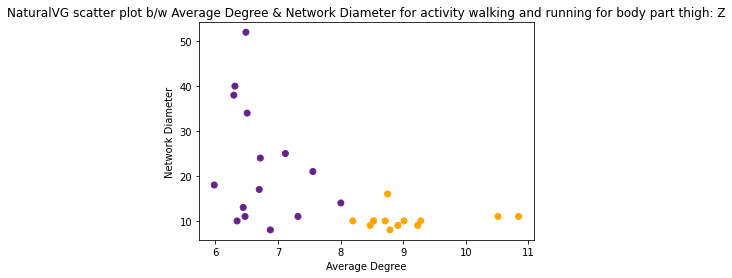

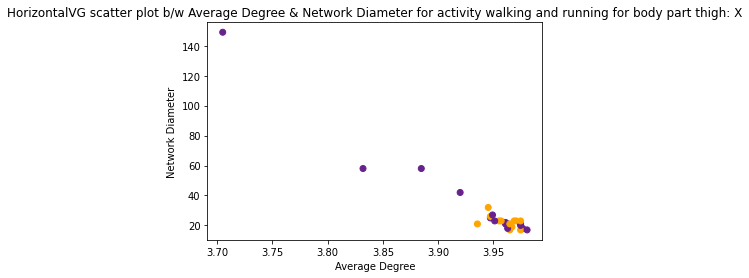

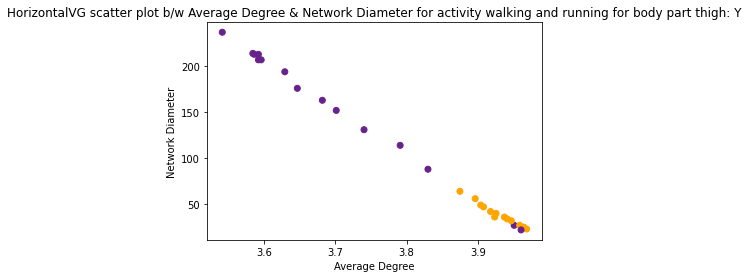

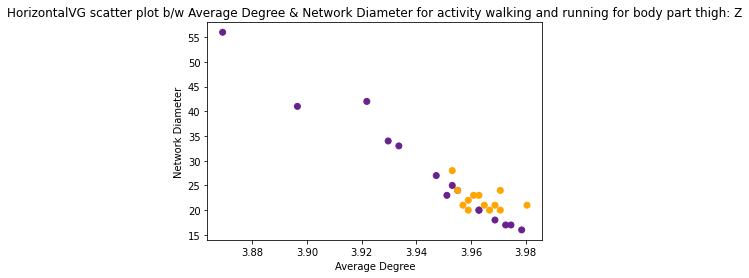

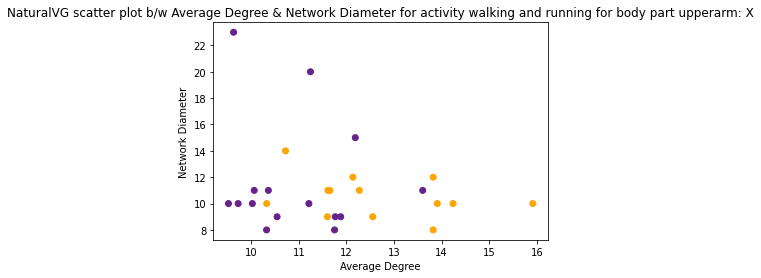

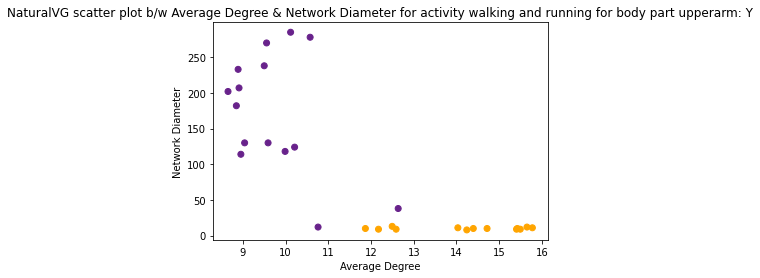

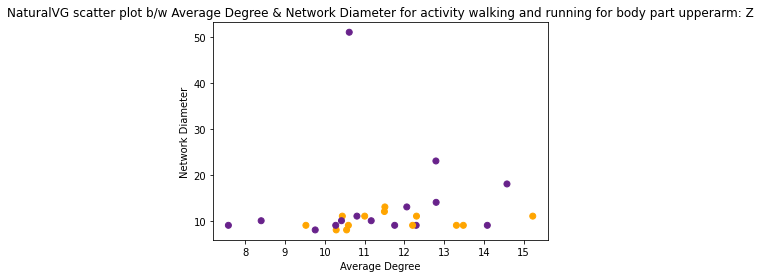

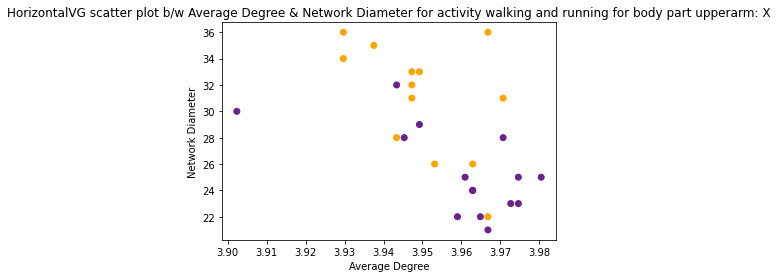

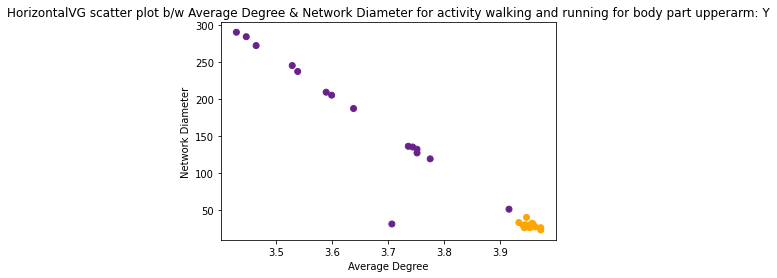

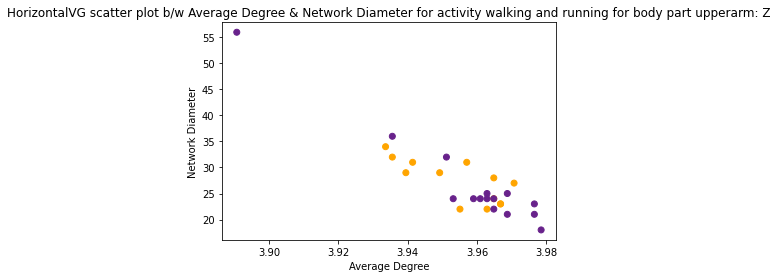

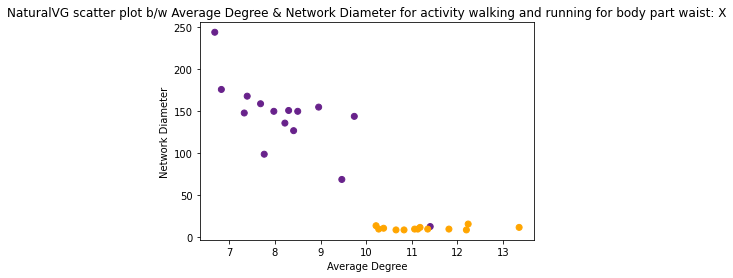

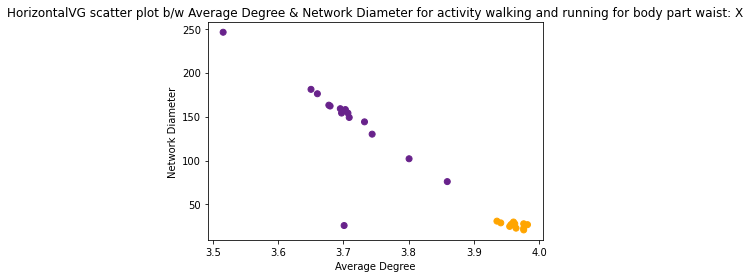

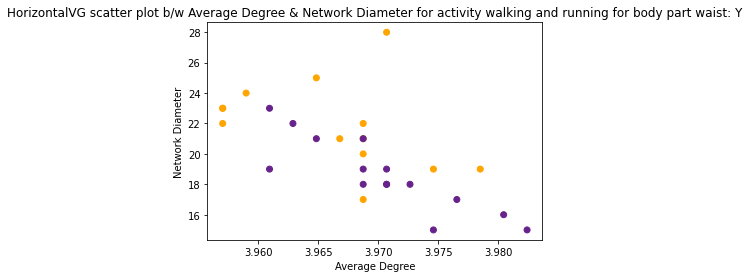

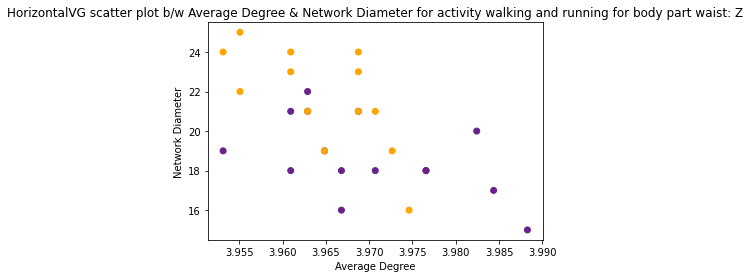

In [72]:
"""generating scatter plot between Average Degree & Network Diameter for activity walking and running for body part """

scatter_plot_1 = final_table[(final_table['Activity'] == 'walking') | (final_table['Activity'] == 'running')]
activities = ['walking', 'running' ]
colors = dict(zip(activities, ["orange", "#68228B"]))
axis = list("XYZ")
methods = ["NaturalVG", "HorizontalVG"]
sensors = ["chest","forearm","head","shin","thigh","upperarm","waist"]
for sensor in sensors:
  for method in methods:
    for ax in axis:
      results_scatter1 = scatter_plot_1[(scatter_plot_1['Accelerometer Axis'] == ax) & (scatter_plot_1['Method'] == method) & (scatter_plot_1['Sensor'] == sensor)]
      title =  str(method)+ ' scatter plot b/w Average Degree & Network Diameter for activity walking and running for body part '+str(sensor)+': '+str(ax)
      scatterplot('Average Degree', 'Network Diameter', results_scatter1["Activity"].map(colors), title, results_scatter1)

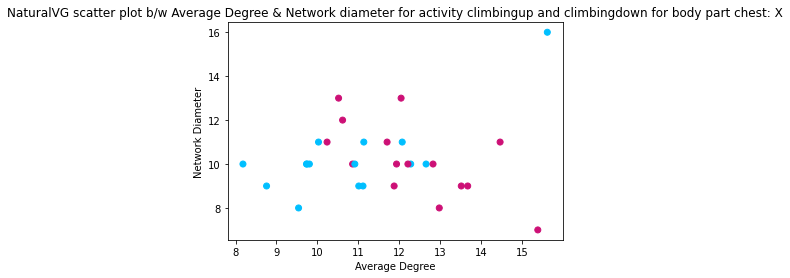

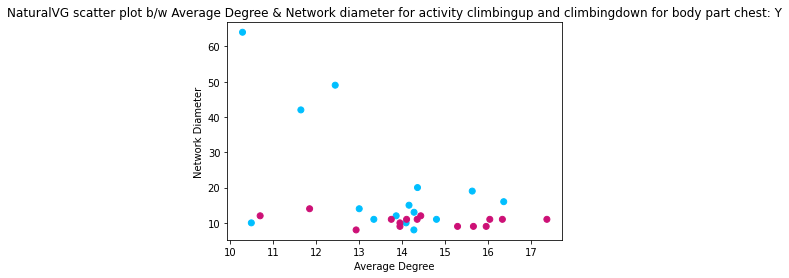

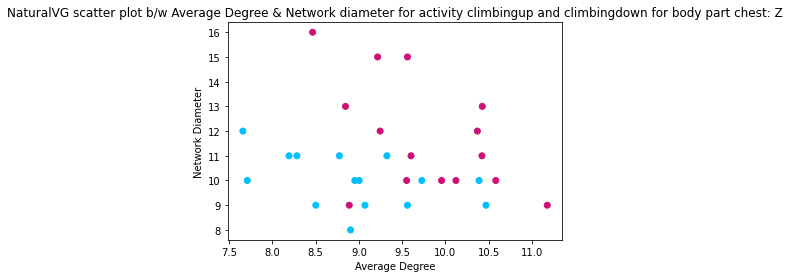

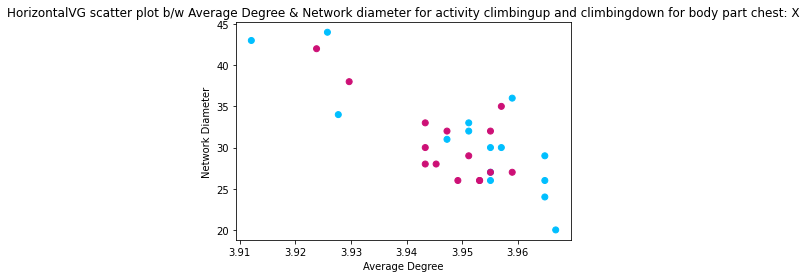

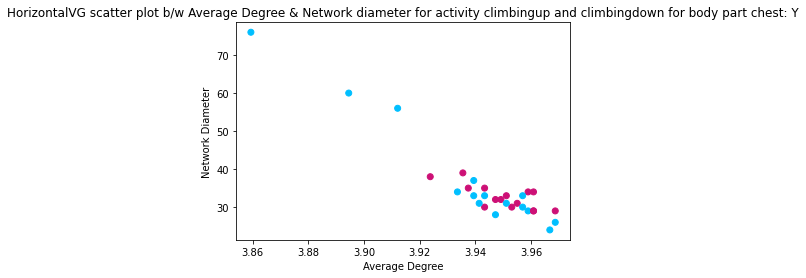

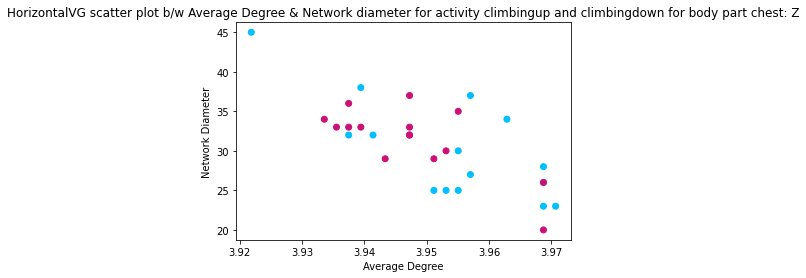

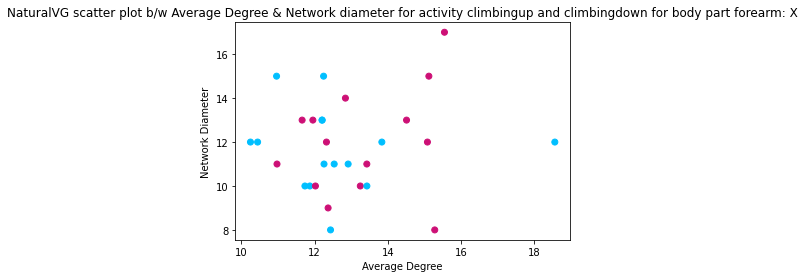

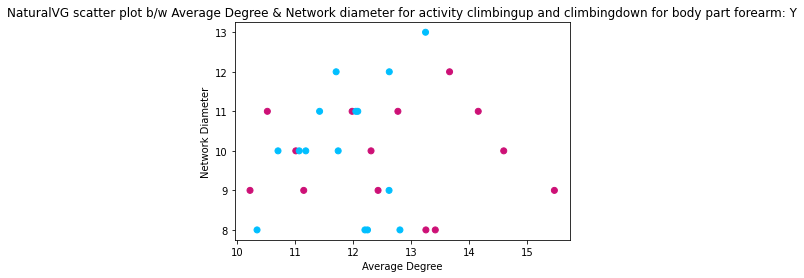

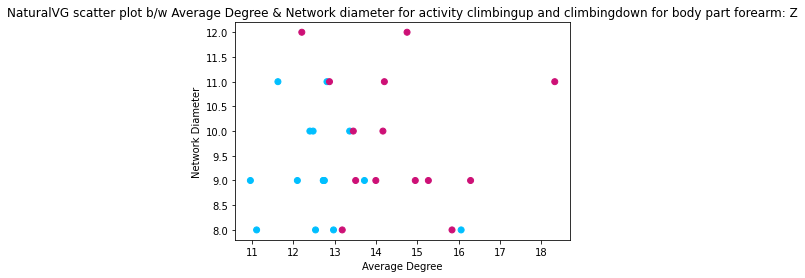

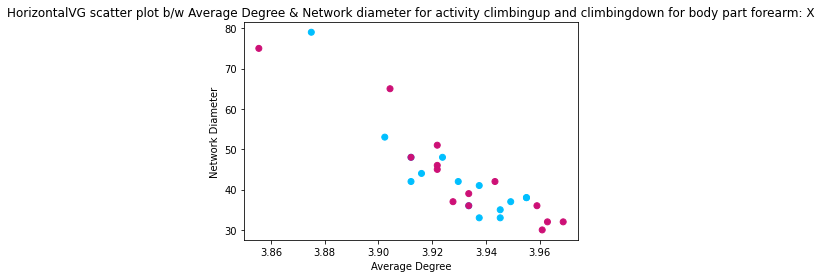

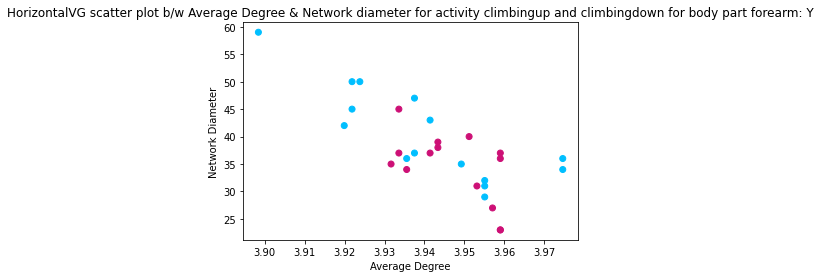

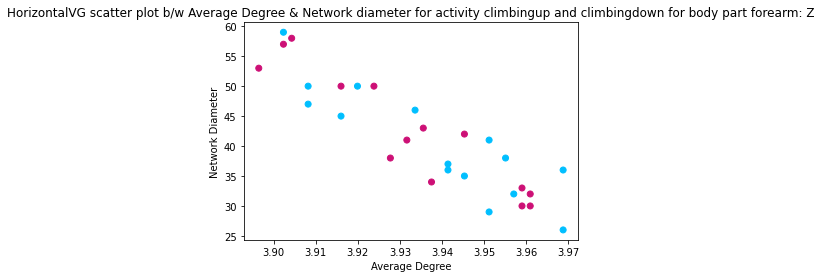

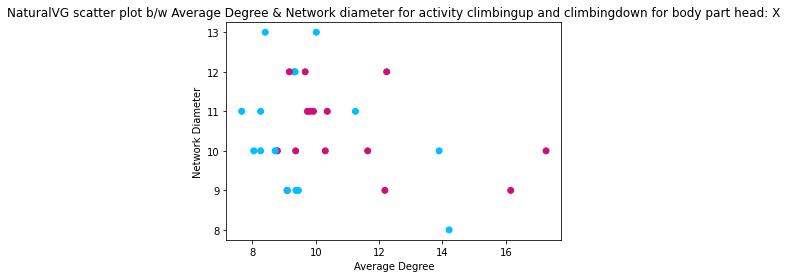

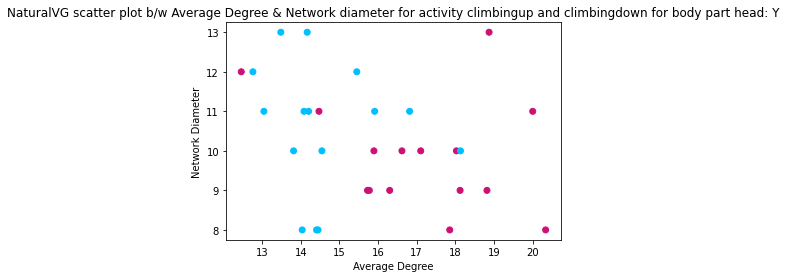

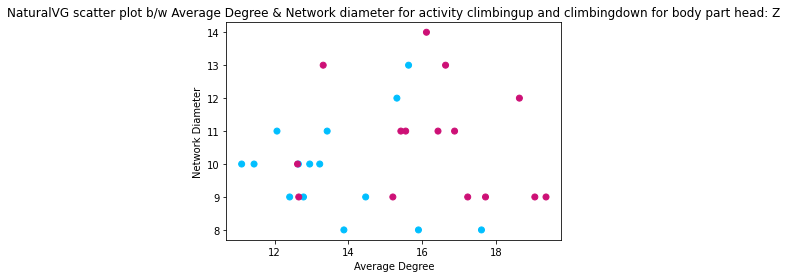

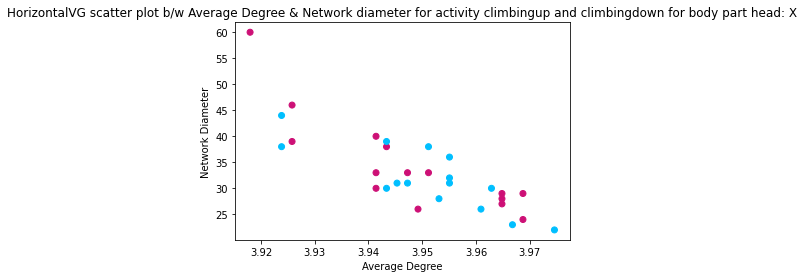

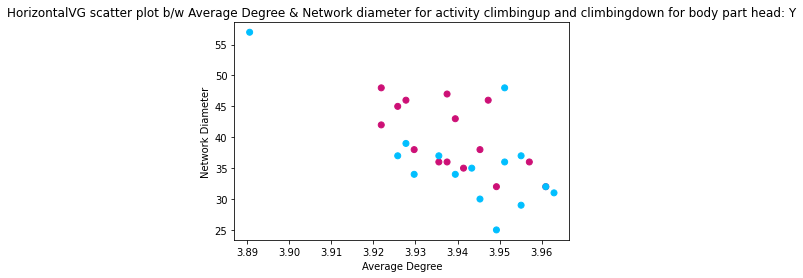

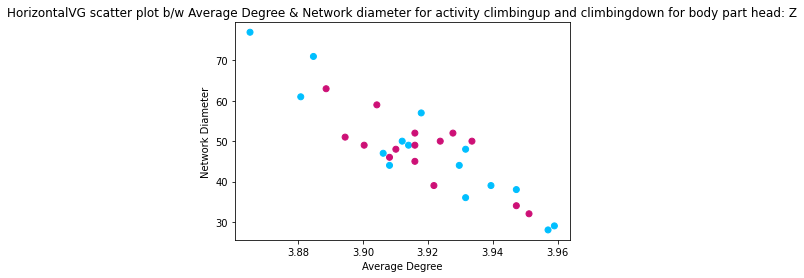

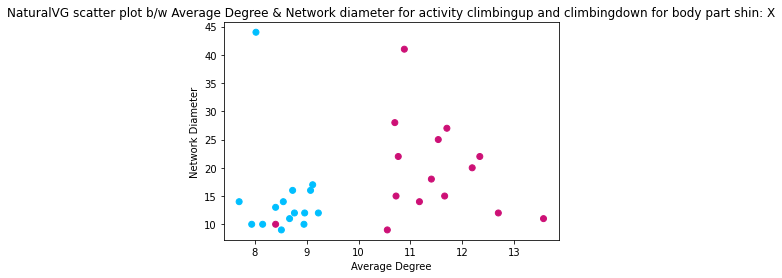

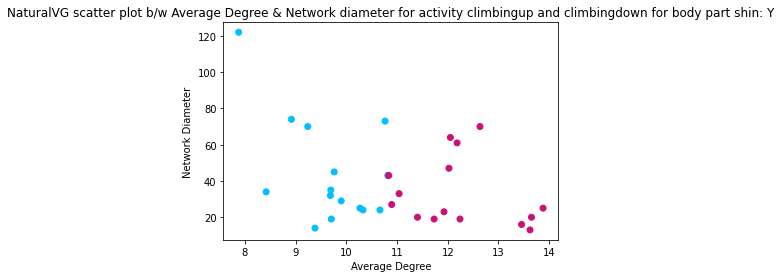

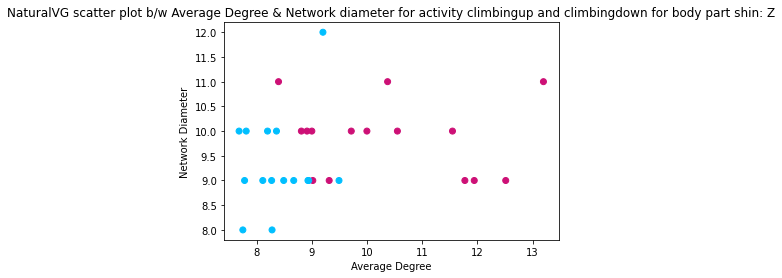

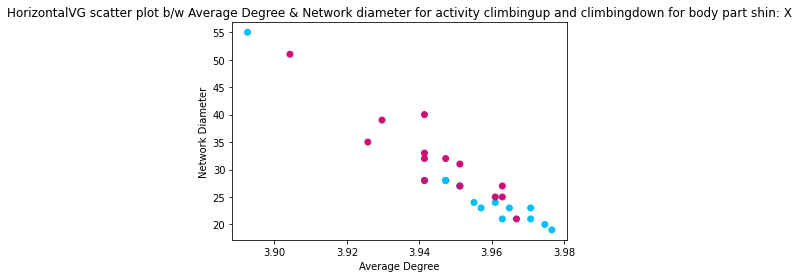

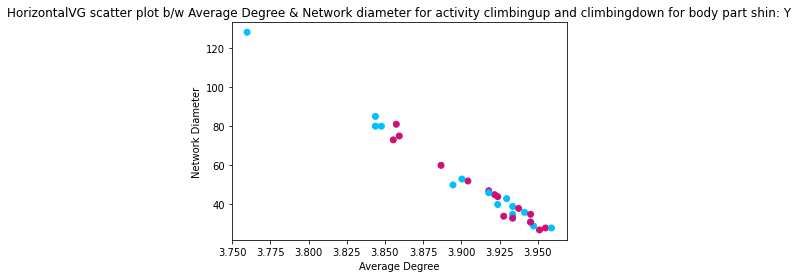

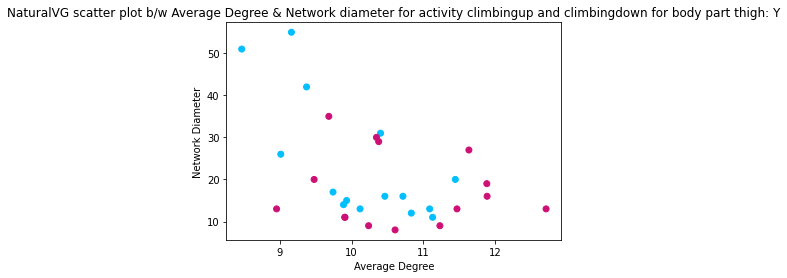

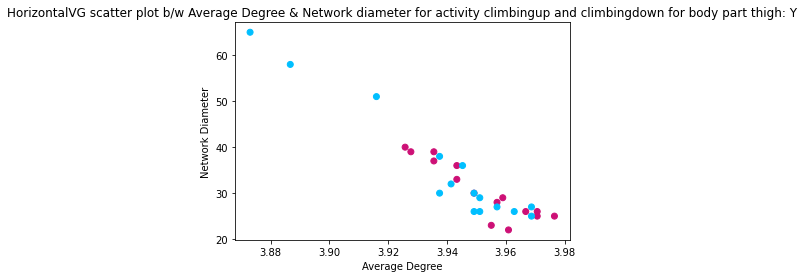

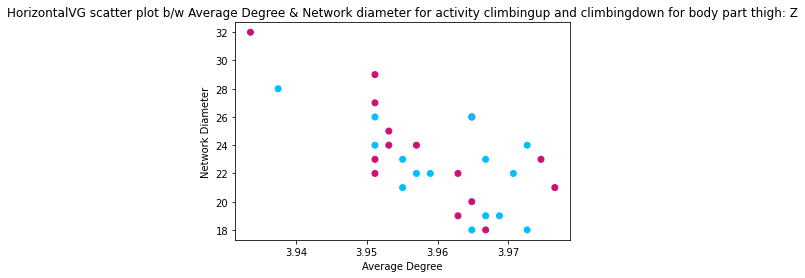

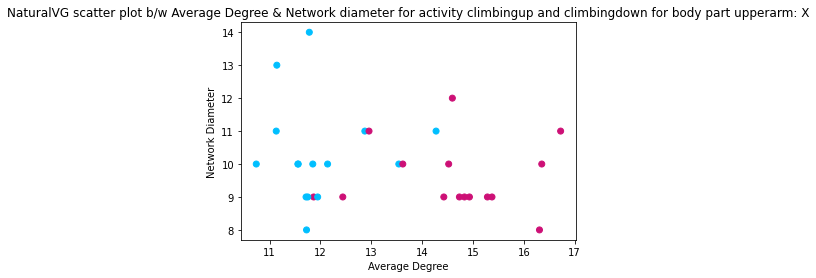

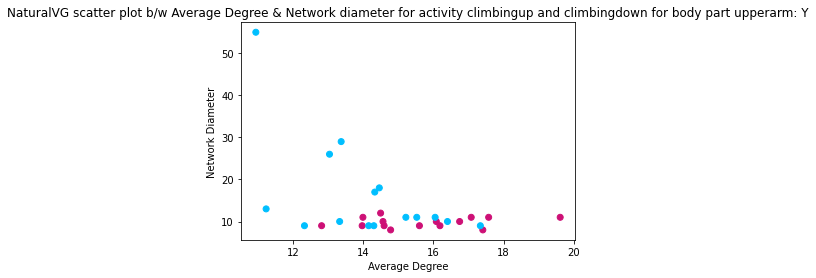

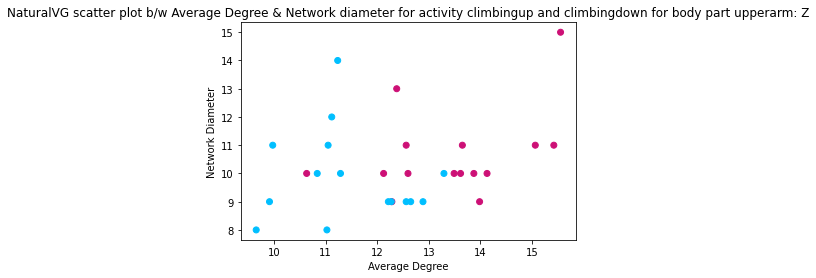

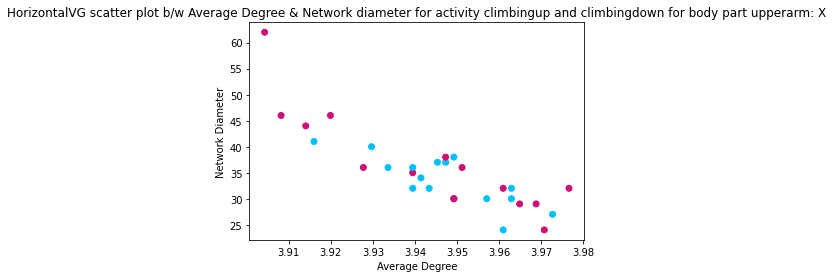

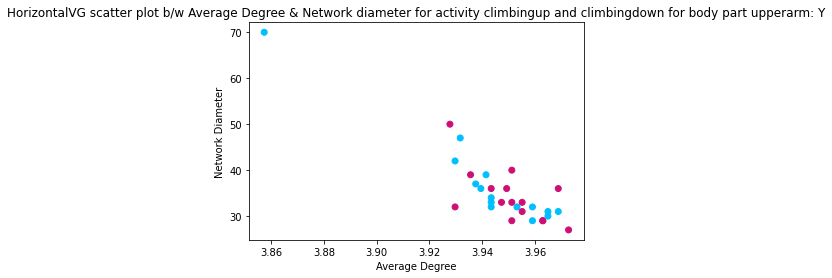

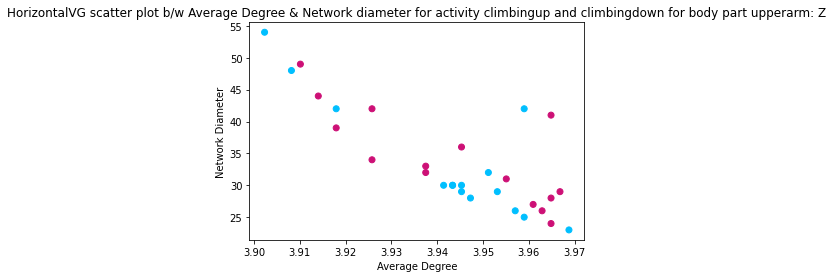

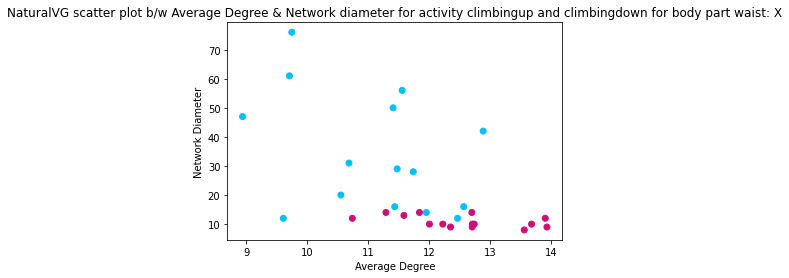

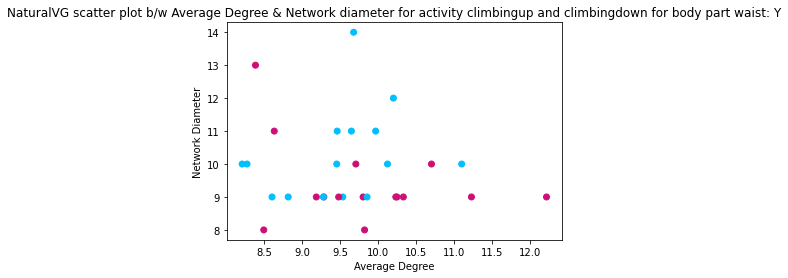

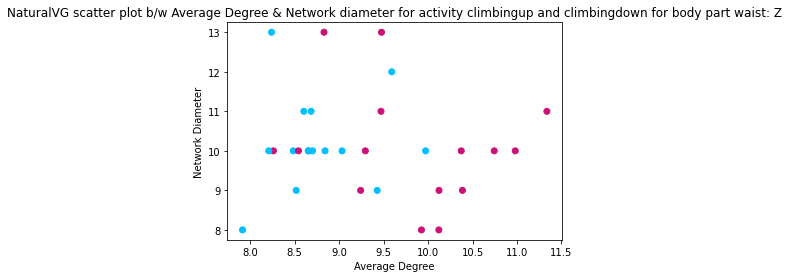

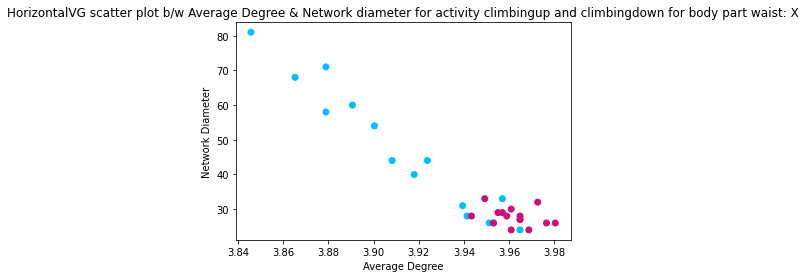

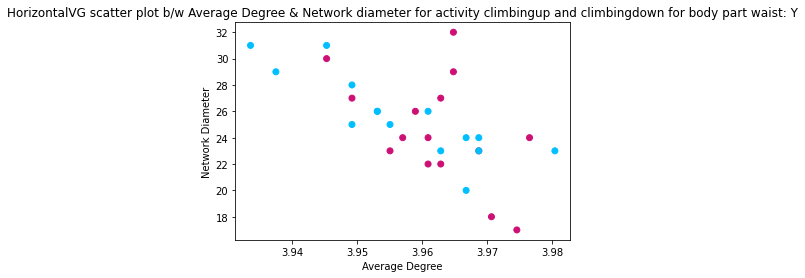

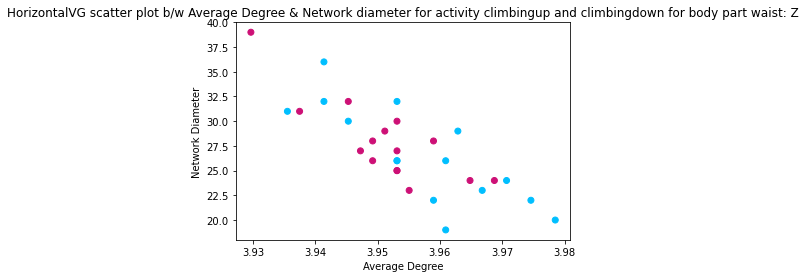

In [73]:
"""generating scatter plot b/w Average Degree & Network diameter for activity climbingup and climbingdown for body part"""

scatter_plot_2 = final_table[(final_table['Activity'] == 'climbingup') | (final_table['Activity'] == 'climbingdown')]

activities = ['climbingup','climbingdown' ]
colors = dict(zip(activities, ["#CD1076", "#00BFFF"]))
axis = list("XYZ")
methods = ["NaturalVG", "HorizontalVG"]
sensors = ["chest","forearm","head","shin","thigh","upperarm","waist"]
for sensor in sensors:
  for method in methods:
    for ax in axis:
      results_scatter = scatter_plot_2[(scatter_plot_2['Accelerometer Axis'] == ax) & (scatter_plot_2['Method'] == method) & (scatter_plot_2['Sensor'] == sensor)]
      title =  str(method)+' scatter plot b/w Average Degree & Network diameter for activity climbingup and climbingdown for body part '+str(sensor)+': '+ str(ax)
      scatterplot('Average Degree', 'Network Diameter', results_scatter["Activity"].map(colors), title, results_scatter)

TASK 2

In [74]:
"""defining functions for permuation entropy and complexity"""
import numpy as np


def shan_entropy(frequency_list):
    
    frequency_list = [element for element in frequency_list if element != 0]
    shann_entropy = 0.0
    for freq in frequency_list:
        shann_entropy += freq * np.log(freq)
    shann_entropy = -shann_entropy
    return(shann_entropy)

def ord_patterns(ts, embdim, embdelay):
    
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tp = np.zeros((x.shape[0], m))
    for i in range(m):
        tp[:, i] = np.roll(x, i*t)
    part = tp[(t*m-1):, :] 
    permutation = np.argsort(part)
    ix = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (ix == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def permutation_entropy(op):
    ord_pat = op
    mx_entropy = np.log(len(ord_pat))
    p = np.divide(np.array(ord_pat), float(sum(ord_pat)))
    return(shan_entropy(p)/mx_entropy)

def complexity(op):
    
    pe = permutation_entropy(op)
    const1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    const2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    const3 = 0.5*np.log(len(op))
    Q_o = -1/(const1+const2+const3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (shan_entropy(temp_op_prob2) - 0.5 * shan_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ord_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tp = np.zeros((x.shape[0], m))
    for i in range(m):
        tp[:, i] = np.roll(x, i*t)
    part = tp[(t*m-1):, :] 
    xm = np.mean(part, axis=1)
    weight = np.mean((part - xm[:, None])**2, axis=1)
    permutation = np.argsort(part)
    ix = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == ix])

    return list(counts[counts != 0]) 

In [75]:
"""defining table parameters"""
col_list = ["Subject", "Accelerometer Axis", "Signal Length",
            "Dimension", "Delay", "Permutation Entropy", "Complexity", 
            "Activity", "Sensor"]
final_table_2 = pd.DataFrame(columns=col_list)

activities = ["climbingdown", "climbingup", "running", "walking"]
alia = ["Climbing Down", "Climbing Up", "Running", "Walking"]
activity_dic = dict(zip(activities, alia))

subjects = list(range(1, 16))
axis = list("xyz")
signals = [1024,2048,4096]
dimensions = [3, 4, 5, 6]
delays = [1, 2, 3]
sensors = ["chest","forearm","head","shin","thigh","upperarm","waist"]

for subject in subjects:
  for activity in activities:
    for sensor in sensors:
      try:
       foldername = "acc_"+activity+"_data_"+str(subject)
       filename = "acc_"+activity+"_"+sensor+".csv"
       print(foldername,'-',sensor)
       task_2 = pd.read_csv(foldername+"/"+filename)
       
       
       for ax in axis:
         for signal in signals:
           for dim in dimensions:
             for delay in delays:
               
                ts=(task_2["attr_"+ax][0:signal])
                op=ord_patterns(ts,dim,delay)
                pe=permutation_entropy(op)
                comp=complexity(op)                
                result = [subject, ax.upper(), signal, dim, delay,
                     permutation_entropy(op), complexity(op), activity_dic[activity],sensor]
                d = dict(zip(col_list, result))
                final_table_2 = final_table_2.append(d, ignore_index=True)
      except Exception as e:
        continue

acc_climbingdown_data_1 - chest
acc_climbingdown_data_1 - forearm
acc_climbingdown_data_1 - head
acc_climbingdown_data_1 - shin
acc_climbingdown_data_1 - thigh
acc_climbingdown_data_1 - upperarm
acc_climbingdown_data_1 - waist
acc_climbingup_data_1 - chest
acc_climbingup_data_1 - forearm
acc_climbingup_data_1 - head
acc_climbingup_data_1 - shin
acc_climbingup_data_1 - thigh
acc_climbingup_data_1 - upperarm
acc_climbingup_data_1 - waist
acc_running_data_1 - chest
acc_running_data_1 - forearm
acc_running_data_1 - head
acc_running_data_1 - shin
acc_running_data_1 - thigh
acc_running_data_1 - upperarm
acc_running_data_1 - waist
acc_walking_data_1 - chest
acc_walking_data_1 - forearm
acc_walking_data_1 - head
acc_walking_data_1 - shin
acc_walking_data_1 - thigh
acc_walking_data_1 - upperarm
acc_walking_data_1 - waist
acc_climbingdown_data_2 - chest
acc_climbingdown_data_2 - forearm
acc_climbingdown_data_2 - head
acc_climbingdown_data_2 - shin
acc_climbingdown_data_2 - thigh
acc_climbingdown

In [76]:
"""final tabulated table"""
final_table_2

Subject Accelerometer Axis Signal Length Dimension Delay  \
0           1                  X          1024         3     1   
1           1                  X          1024         3     2   
2           1                  X          1024         3     3   
3           1                  X          1024         4     1   
4           1                  X          1024         4     2   
...       ...                ...           ...       ...   ...   
43735      15                  Z          4096         5     2   
43736      15                  Z          4096         5     3   
43737      15                  Z          4096         6     1   
43738      15                  Z          4096         6     2   
43739      15                  Z          4096         6     3   

       Permutation Entropy  Complexity       Activity Sensor  
0                 0.863880    0.113789  Climbing Down  chest  
1                 0.960872    0.036053  Climbing Down  chest  
2                 0.985169    0.014123  Climbing Down  chest  
3                 0.807330    0.188031  Climbing Down  chest  
4                 0.937040    0.073841  Climbing Down  chest  
...                    ...         ...            ...    ...  
43735             0.873623    0.196242        Walking  waist  
43736             0.899422    0.161733        Walking  waist  
43737             0.764962    0.305253        Walking  waist  
43738             0.879198    0.223222        Walking  waist  
43739             0.871936    0.224327        Walking  waist  

[43740 rows x 9 columns]

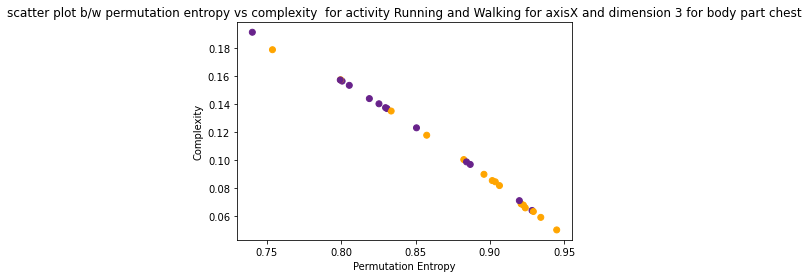

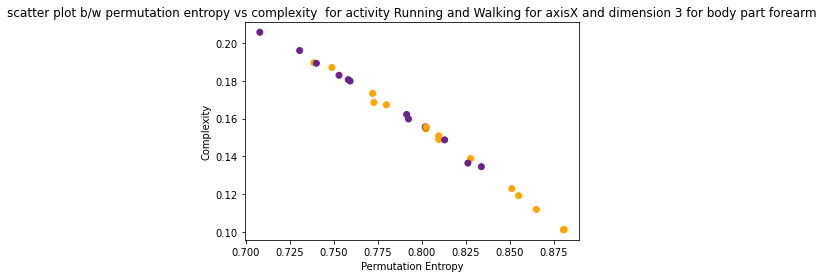

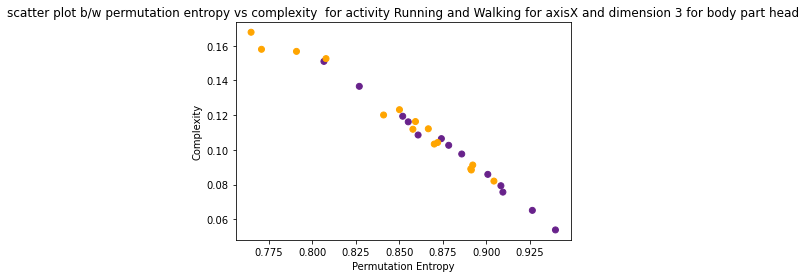

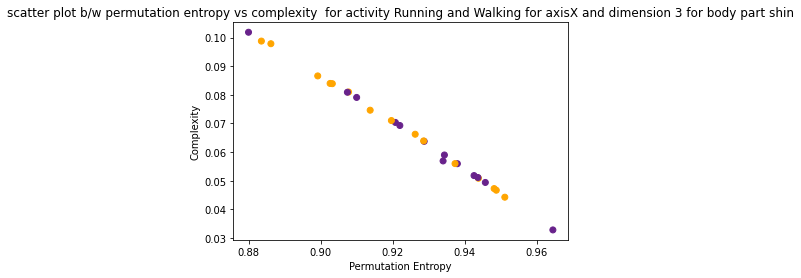

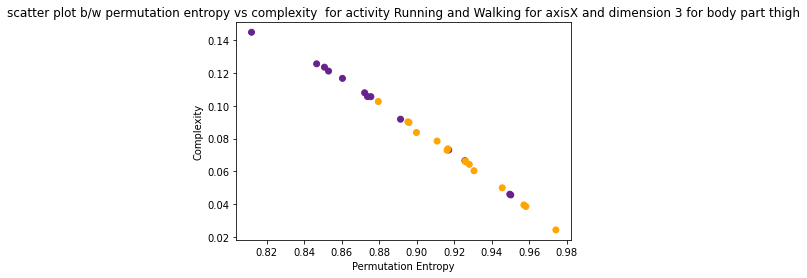

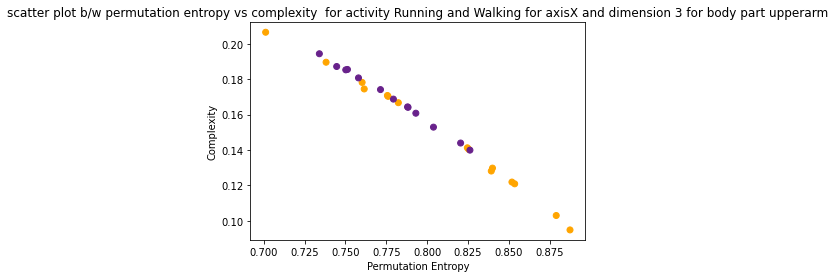

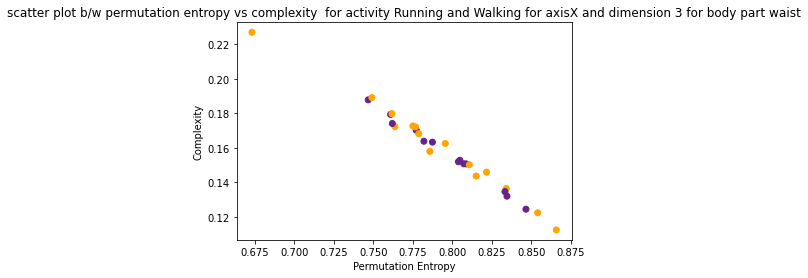

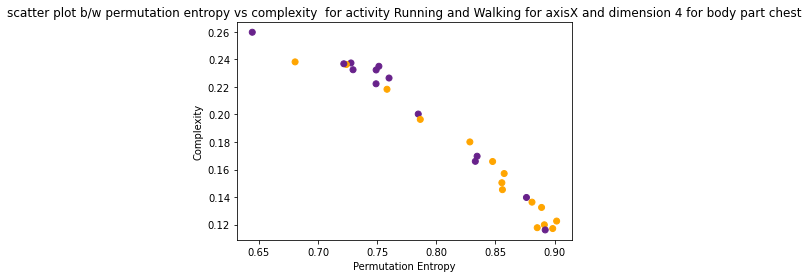

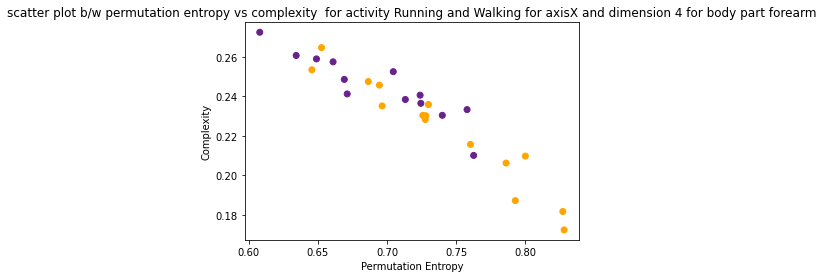

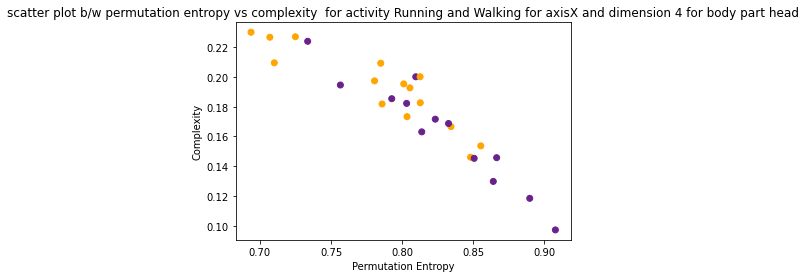

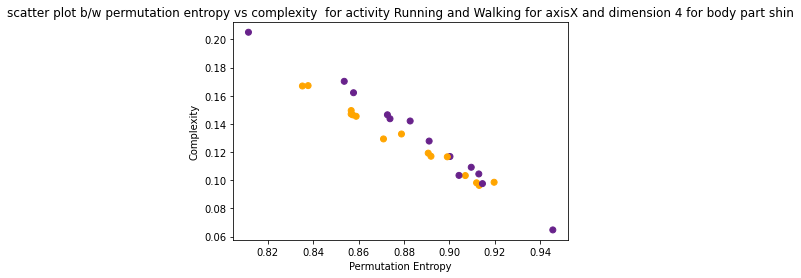

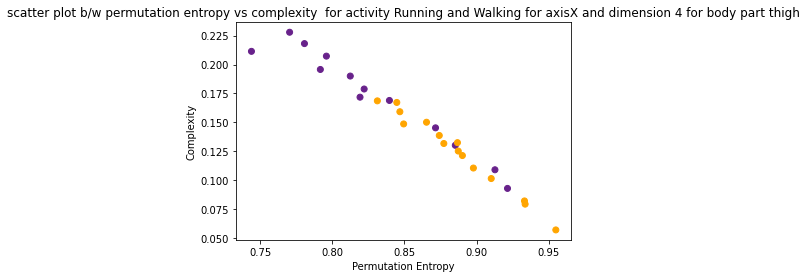

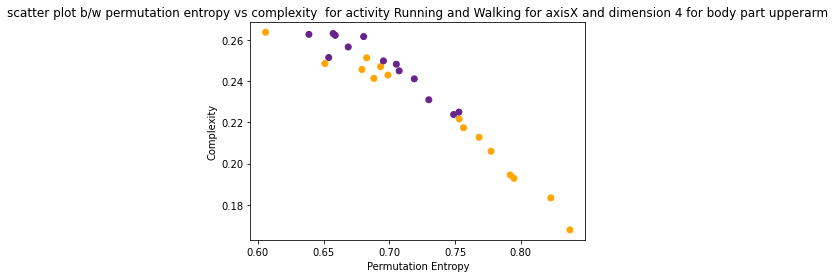

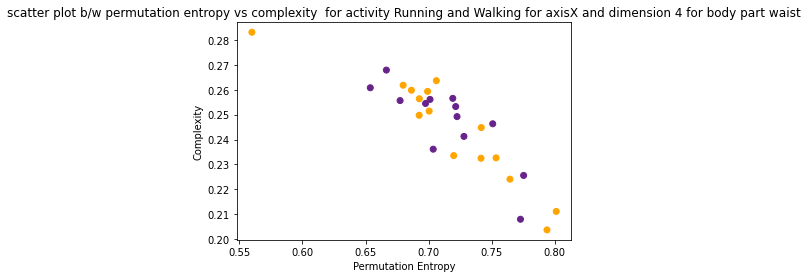

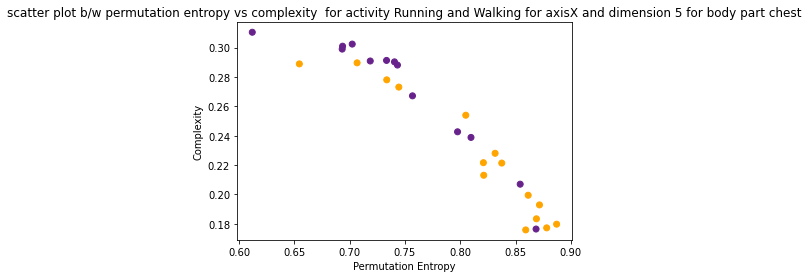

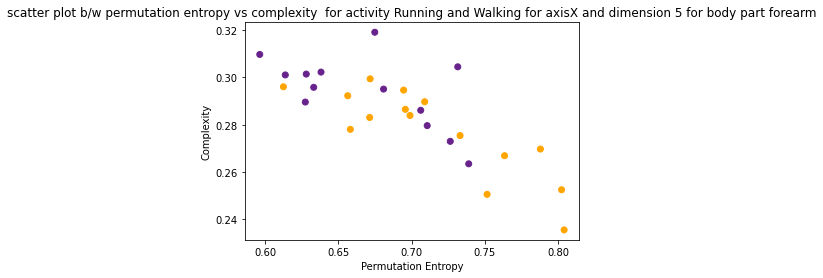

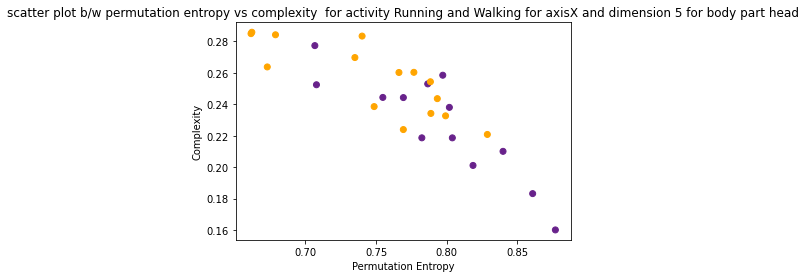

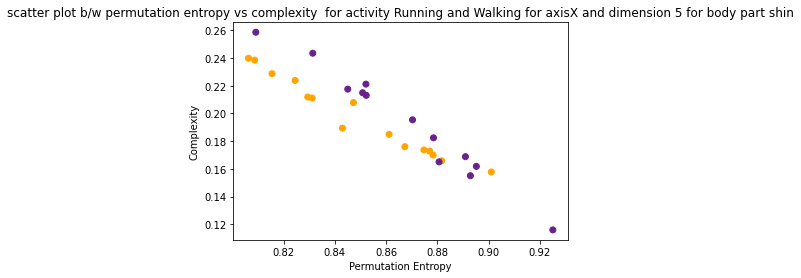

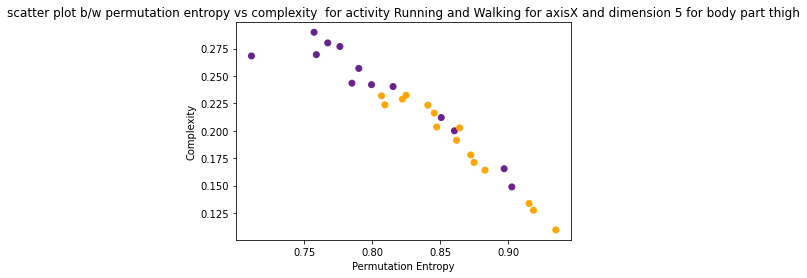

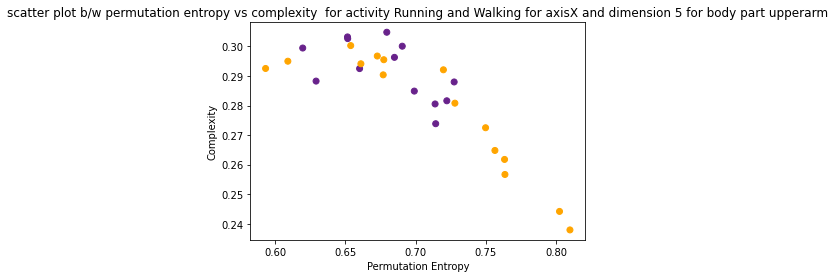

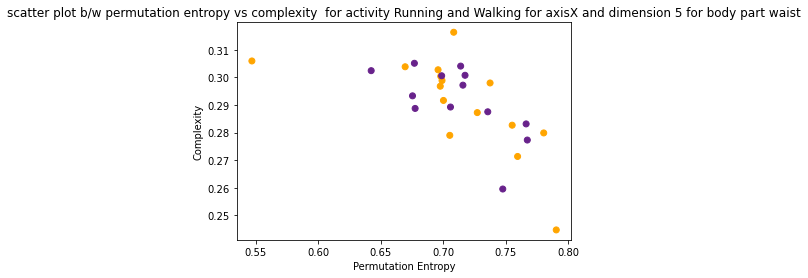

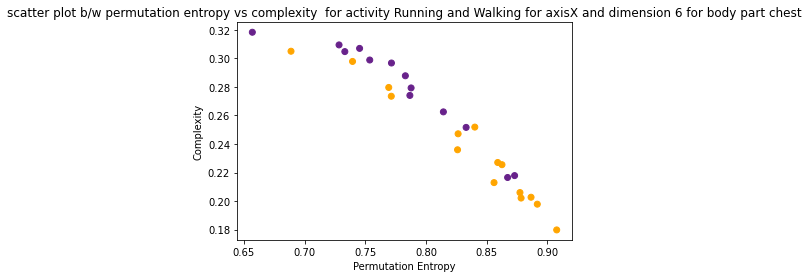

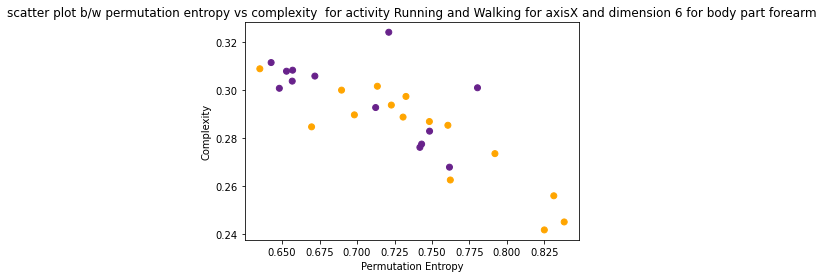

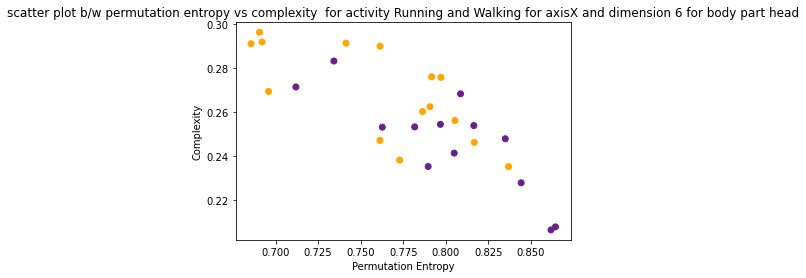

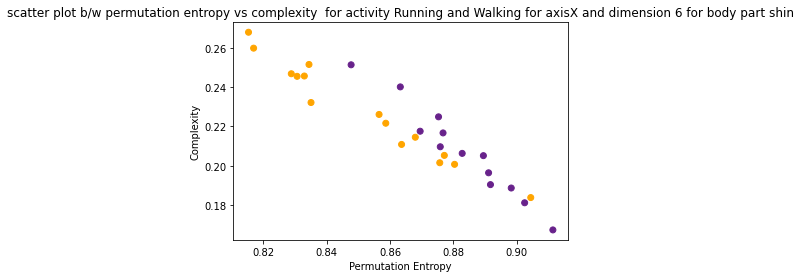

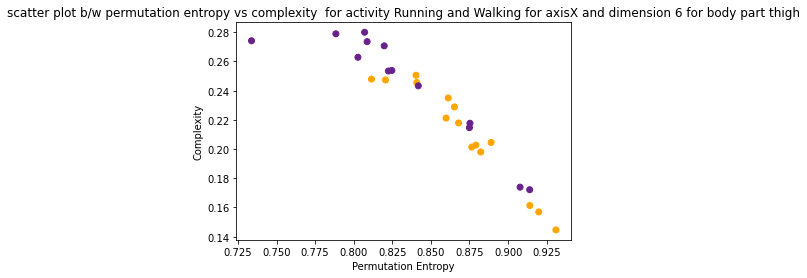

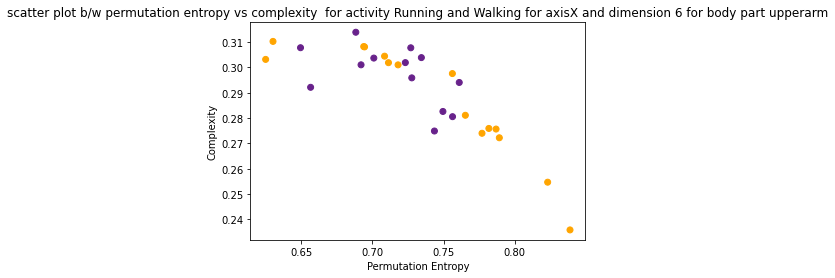

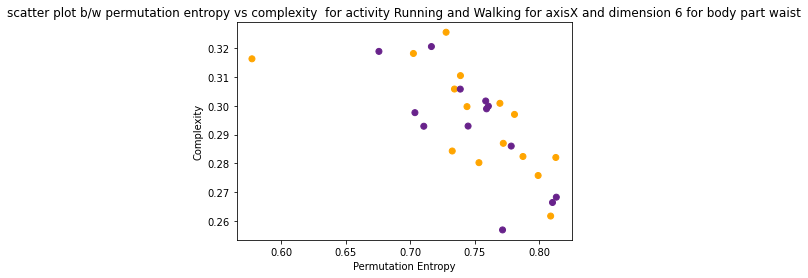

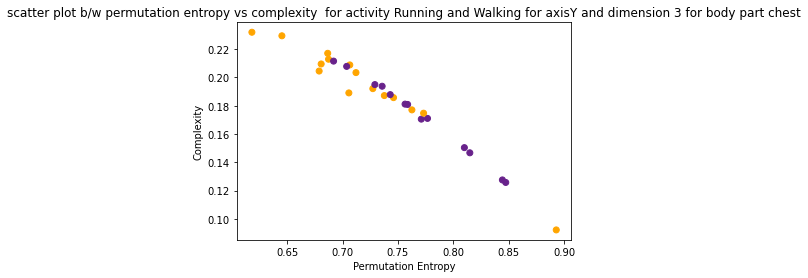

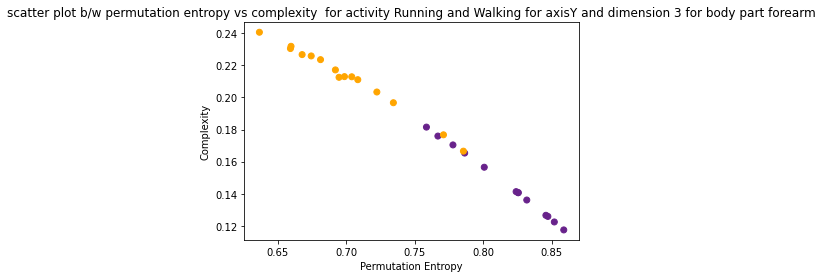

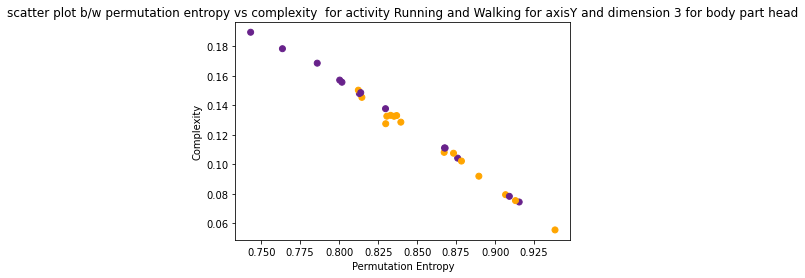

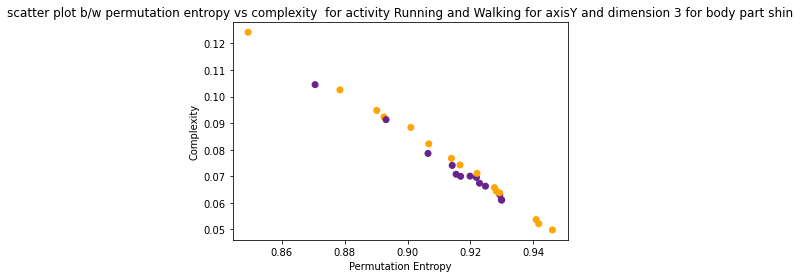

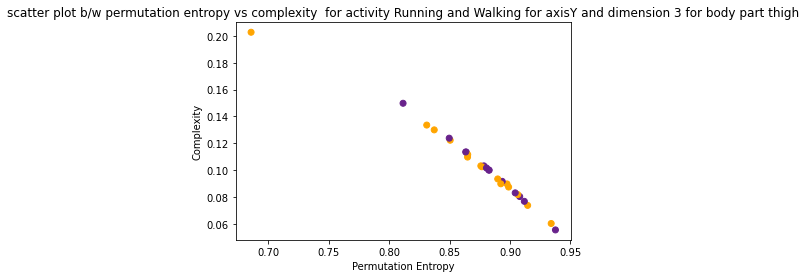

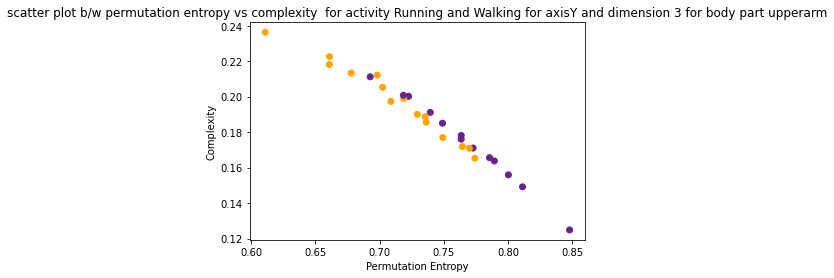

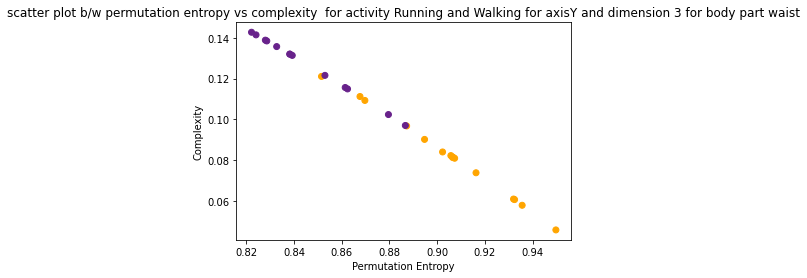

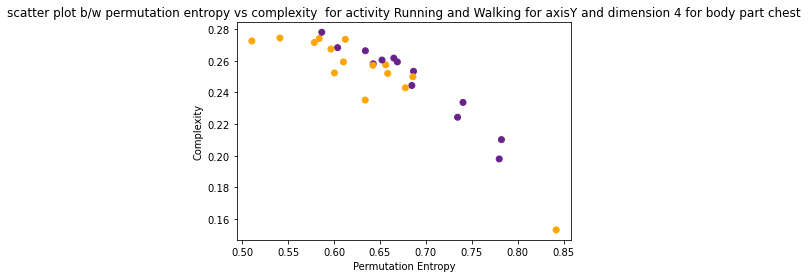

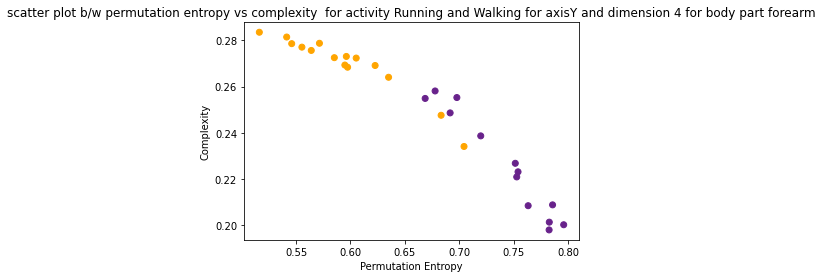

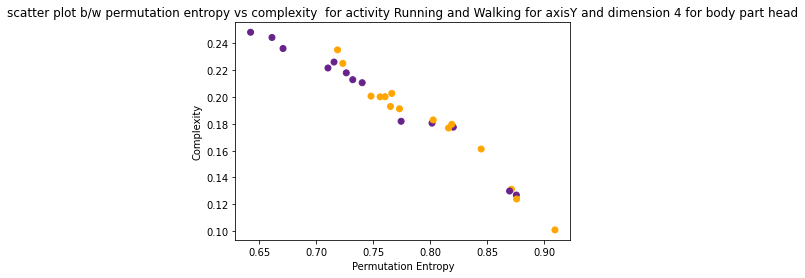

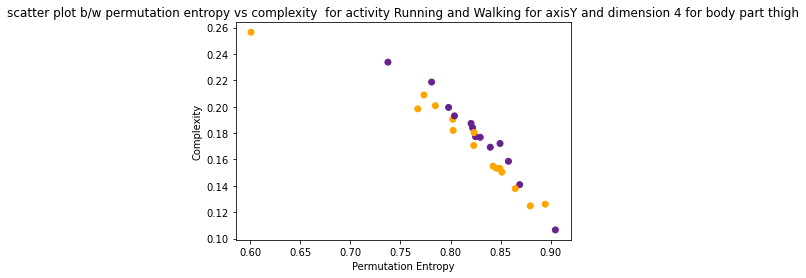

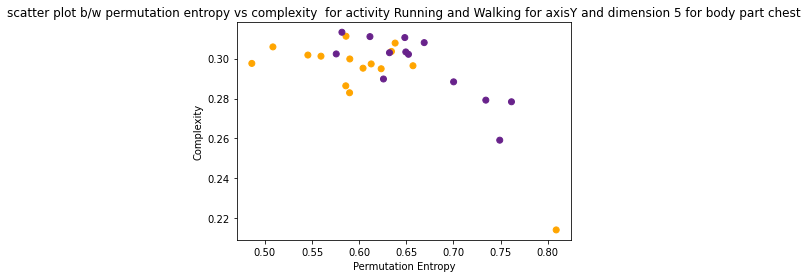

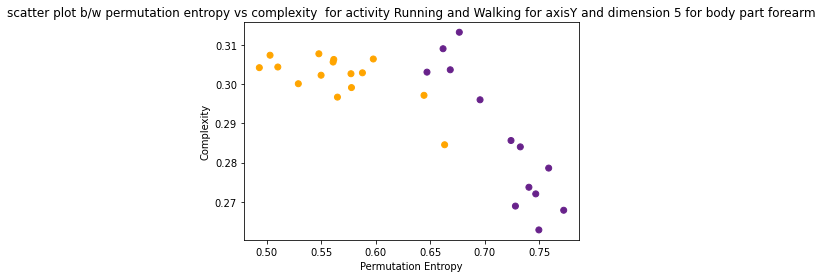

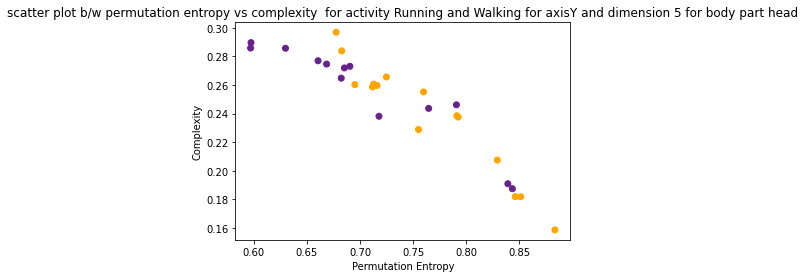

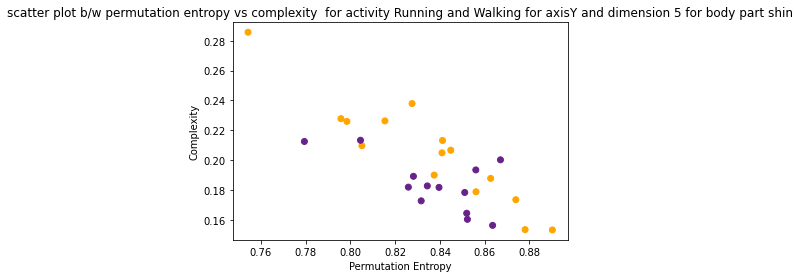

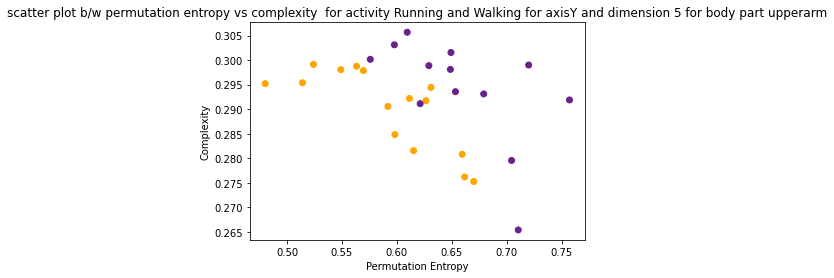

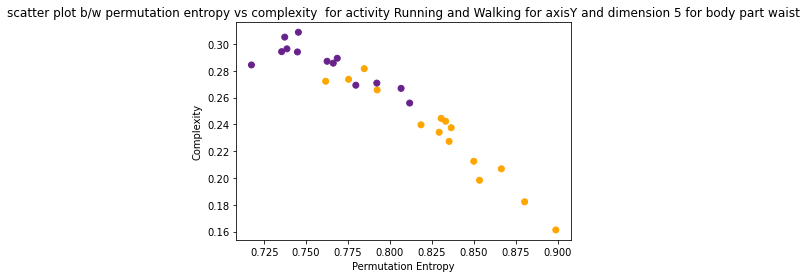

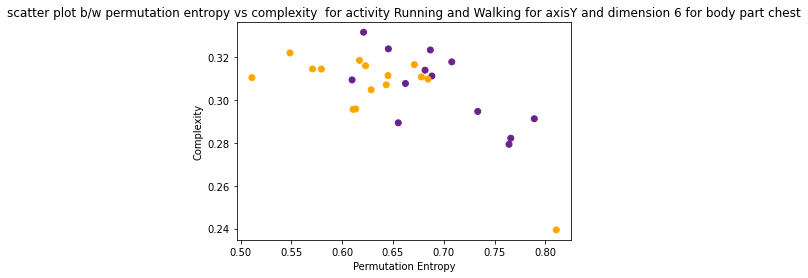

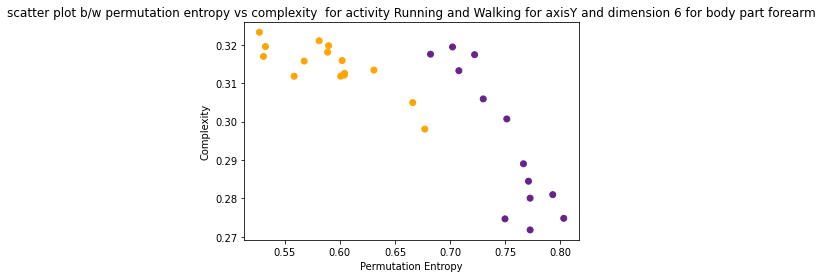

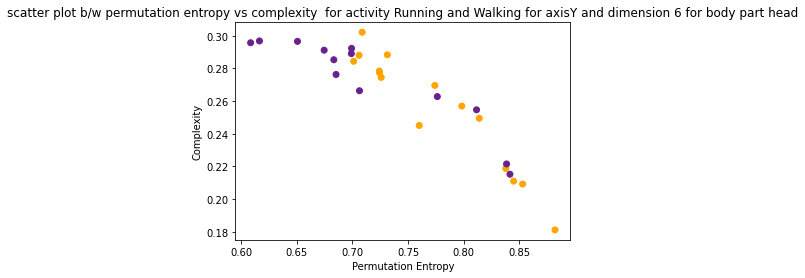

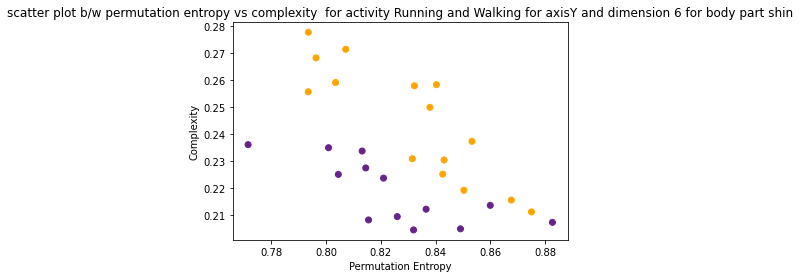

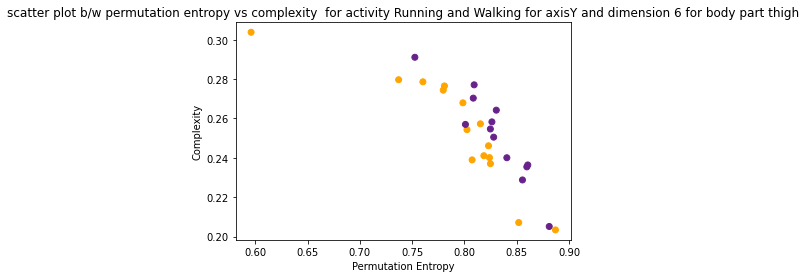

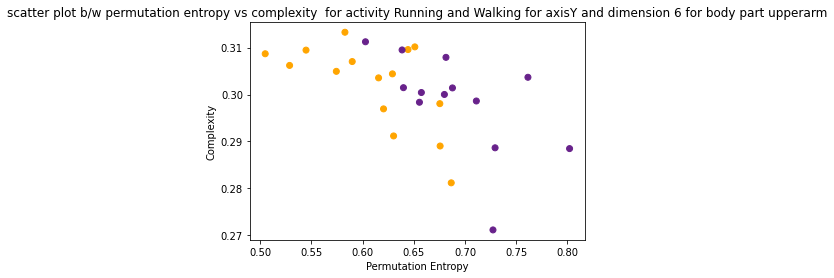

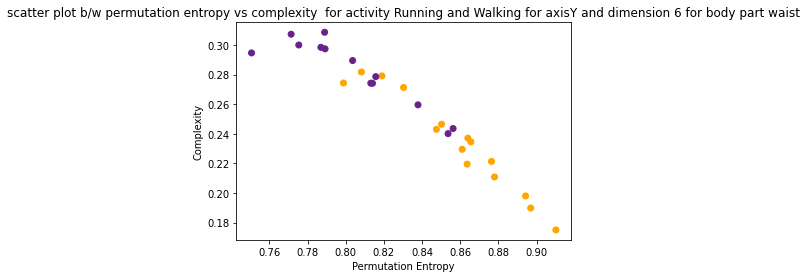

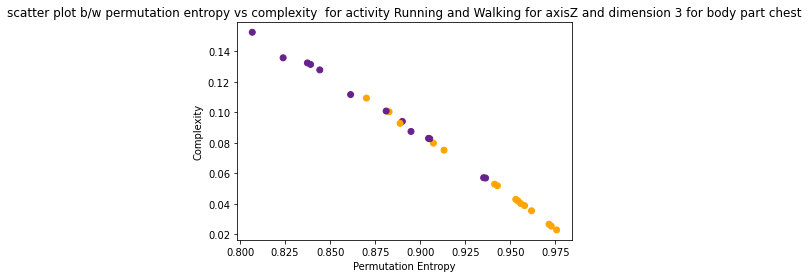

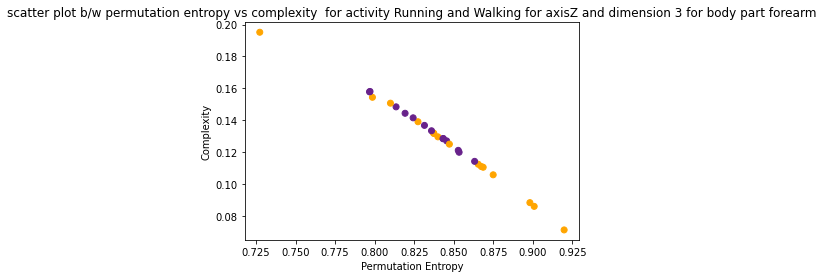

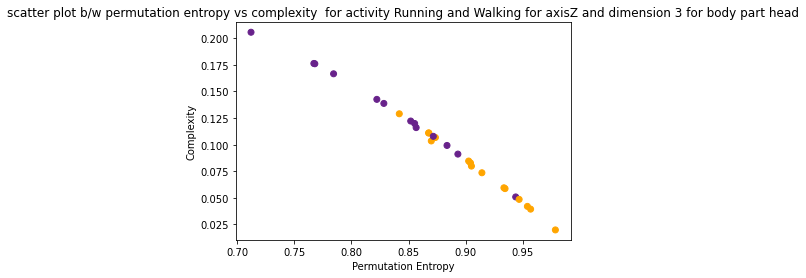

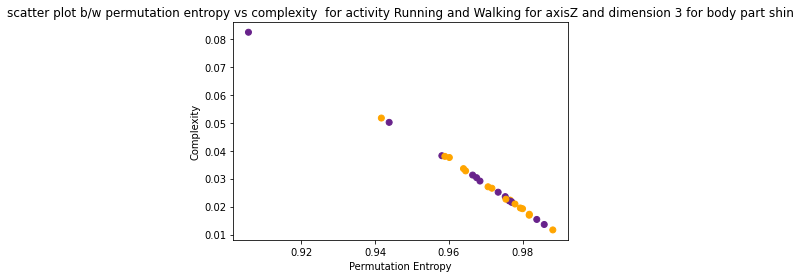

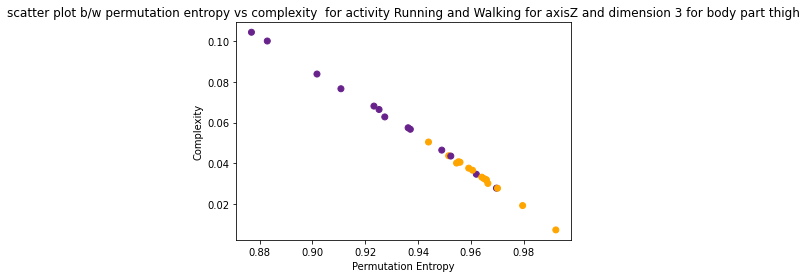

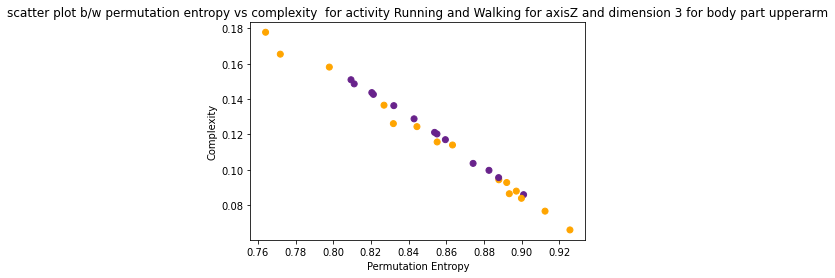

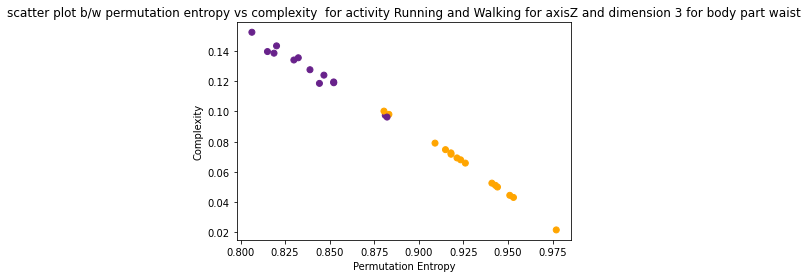

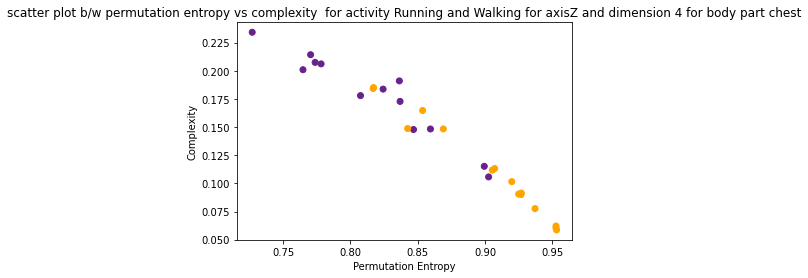

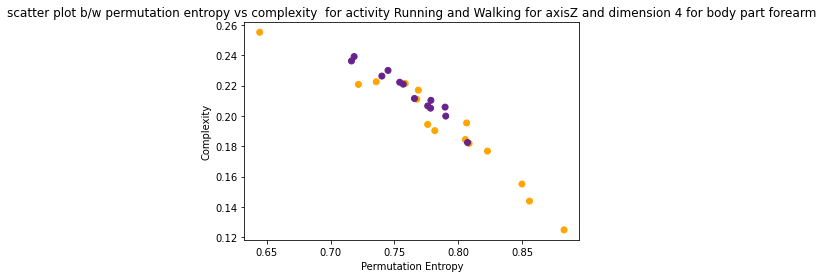

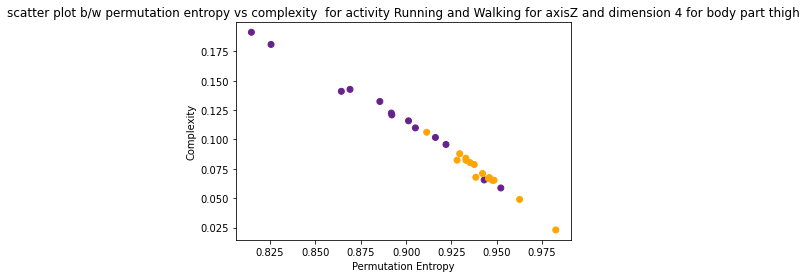

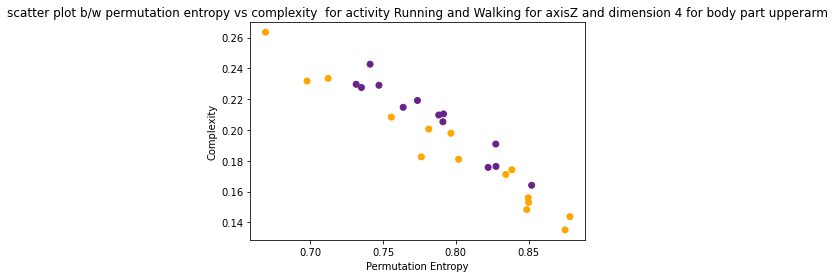

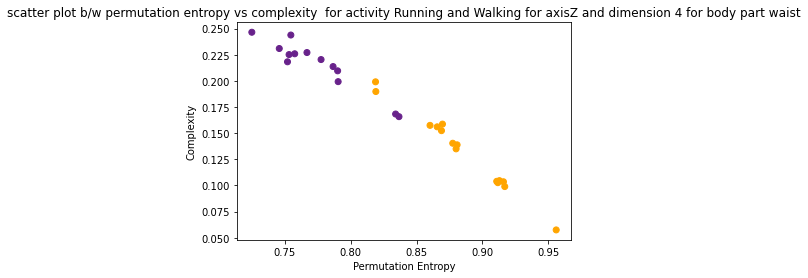

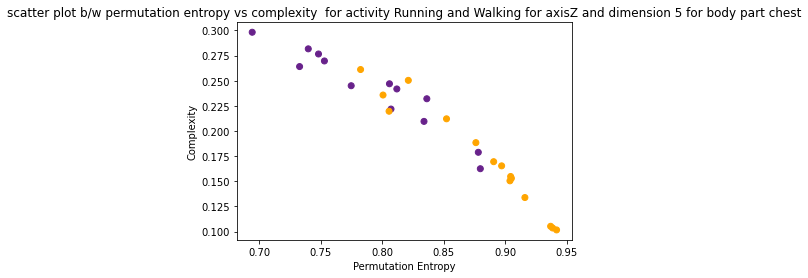

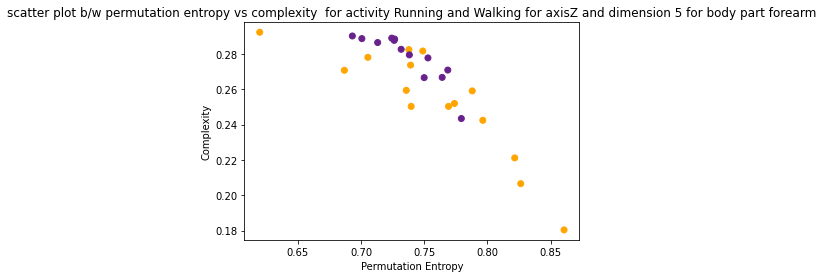

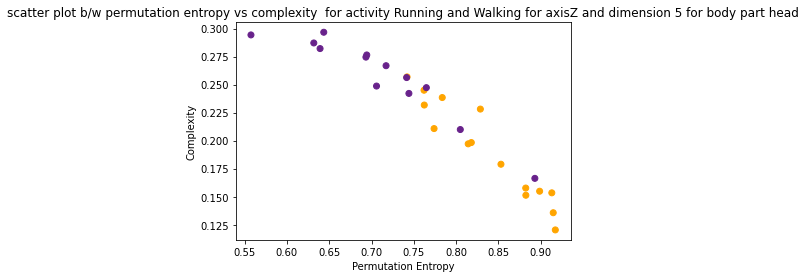

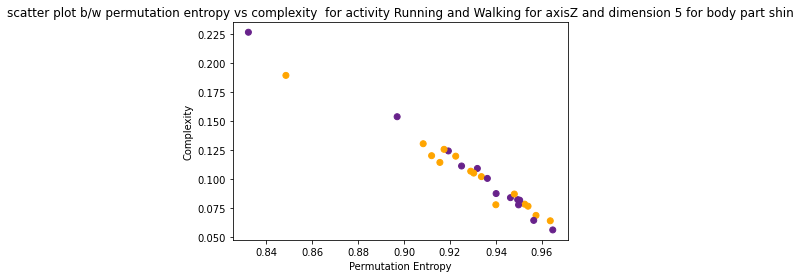

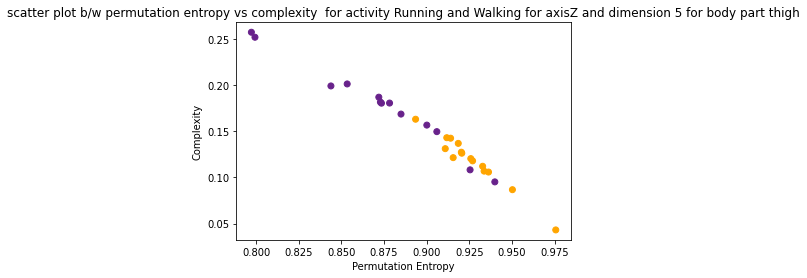

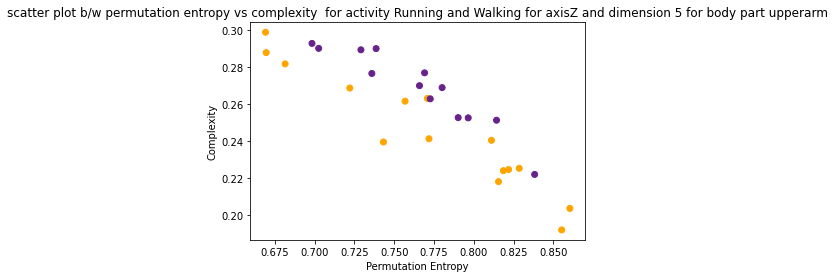

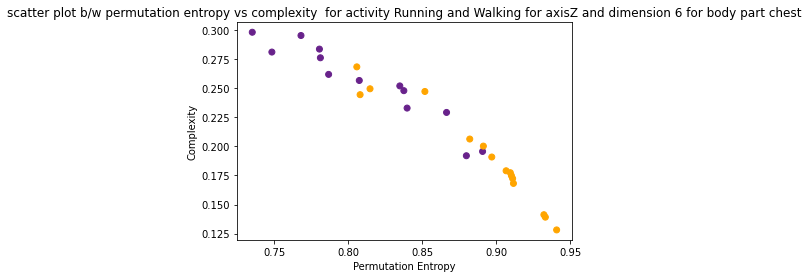

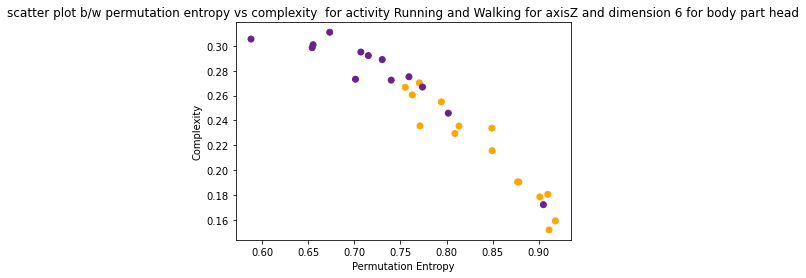

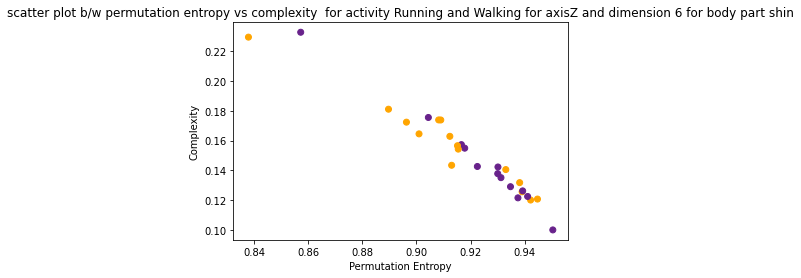

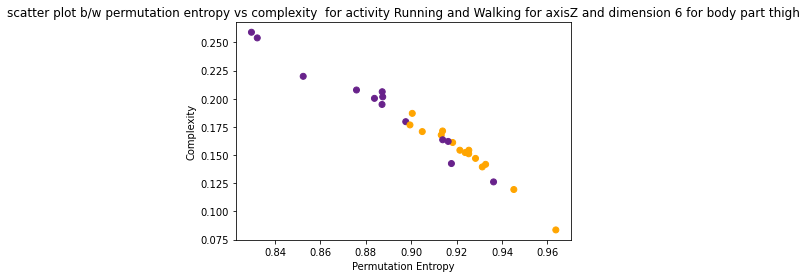

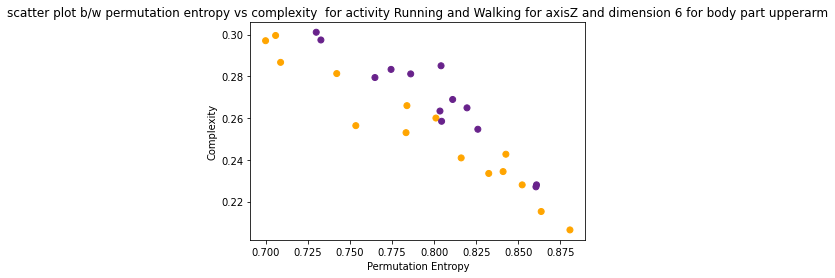

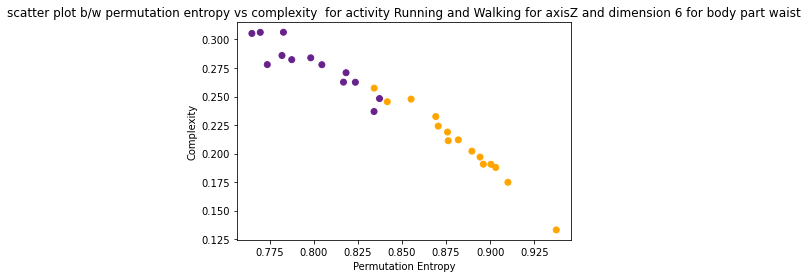

In [77]:
"""generating scatter plot b/w permutation entropy vs complexity  for activity Running and Walking for axis and bodypart """

scatter_plot_1 = final_table_2[((final_table_2['Activity'] == 'Running') | (final_table_2['Activity'] == 'Walking')) & (final_table_2['Delay']== 1) & (final_table_2['Signal Length']== 4096)  ]
activities = ['Running','Walking' ]
colors = dict(zip(activities, ["orange", "#68228B"]))
axis = list("XYZ")
sensors = ["chest","forearm","head","shin","thigh","upperarm","waist"]
dimensions = [3, 4, 5, 6]

for ax in axis:
  for dimension in dimensions:
    for sensor in sensors:
      result_scatter_1 = scatter_plot_1[(scatter_plot_1['Accelerometer Axis'] == ax) & (scatter_plot_1['Dimension'] == dimension) & (scatter_plot_1['Sensor'] == sensor)]
      title = 'scatter plot b/w permutation entropy vs complexity  for activity Running and Walking for axis'+ str(ax)+ ' and dimension ' + str(dimension) + ' for body part '+str(sensor)
      scatterplot('Permutation Entropy', 'Complexity',result_scatter_1['Activity'].map(colors), title, result_scatter_1)

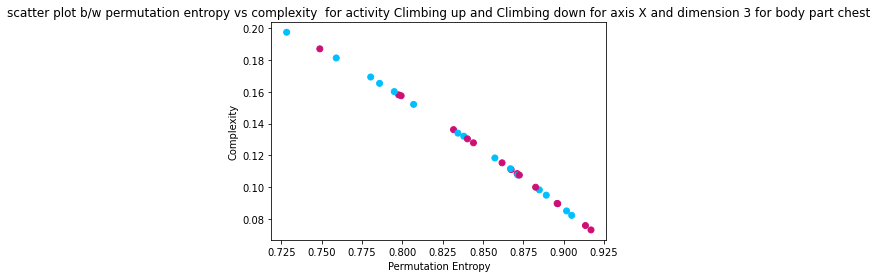

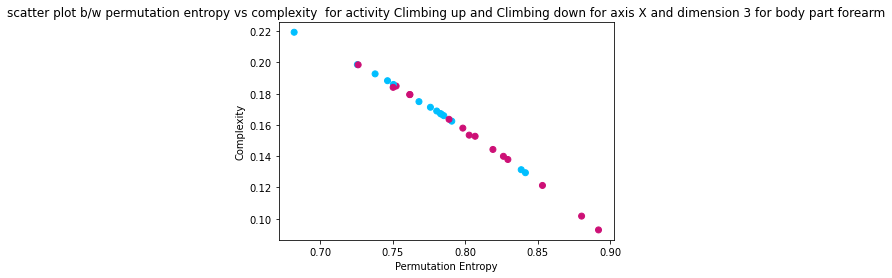

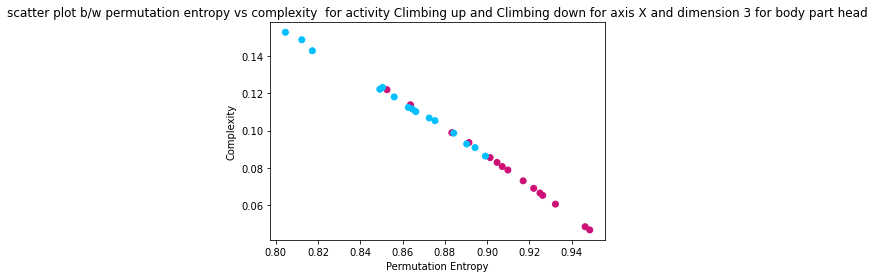

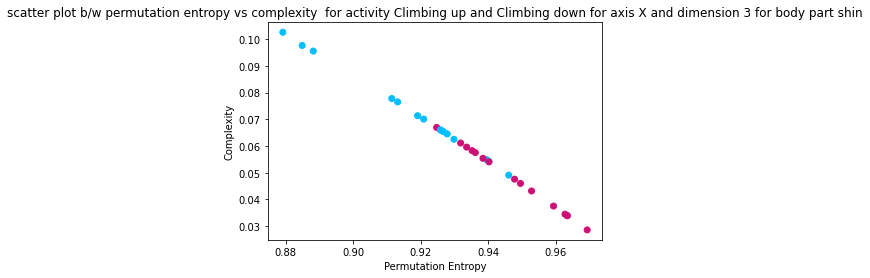

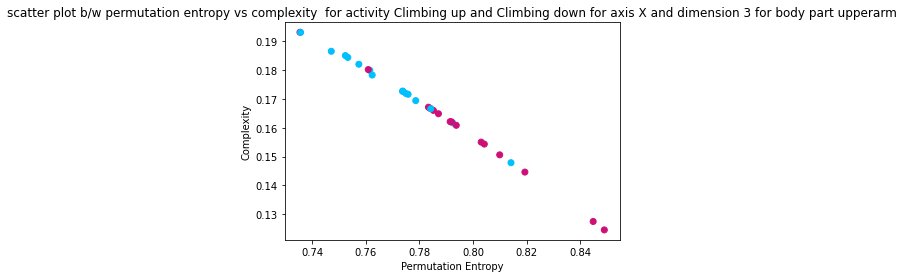

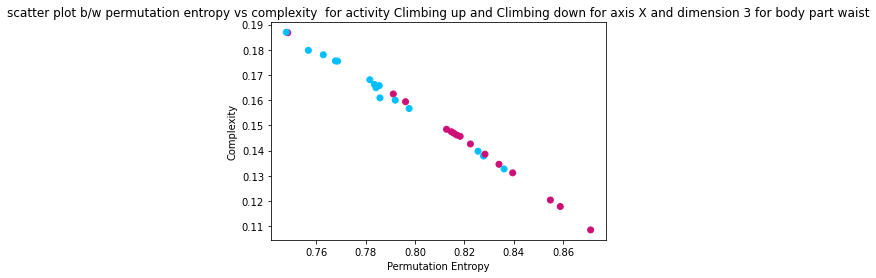

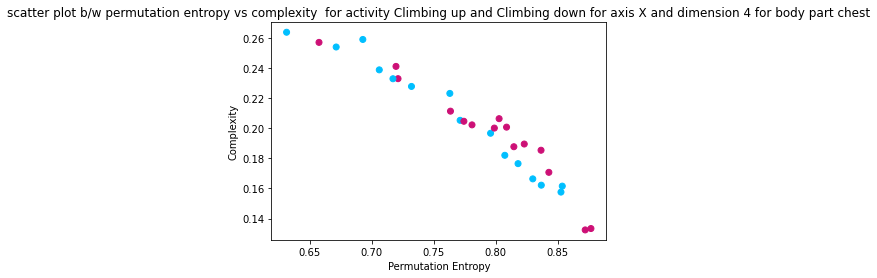

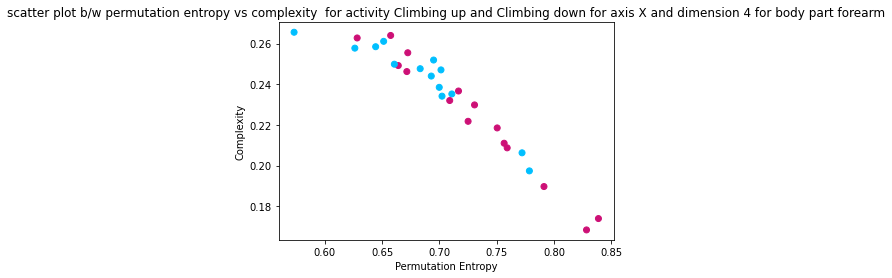

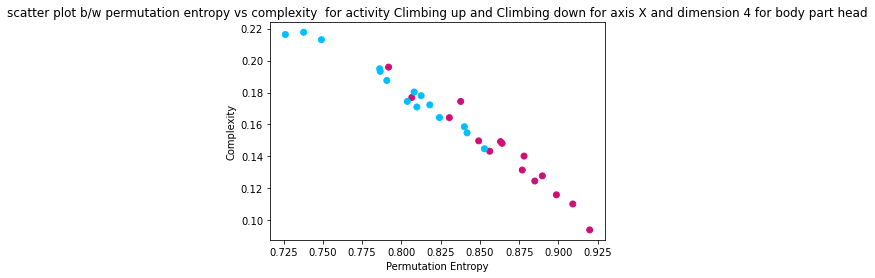

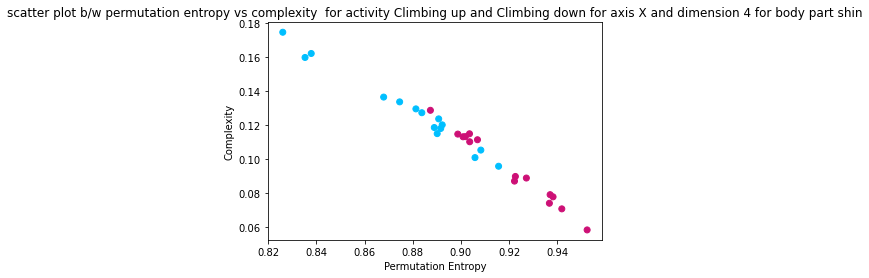

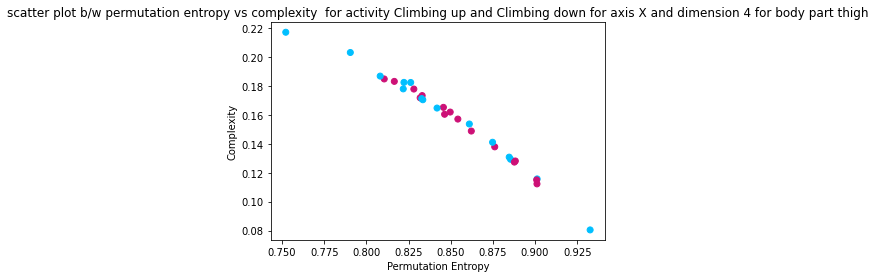

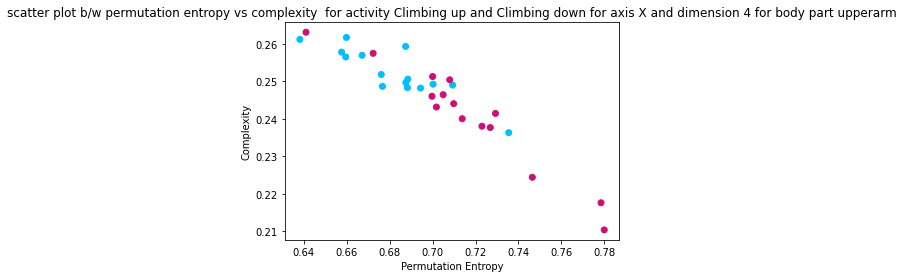

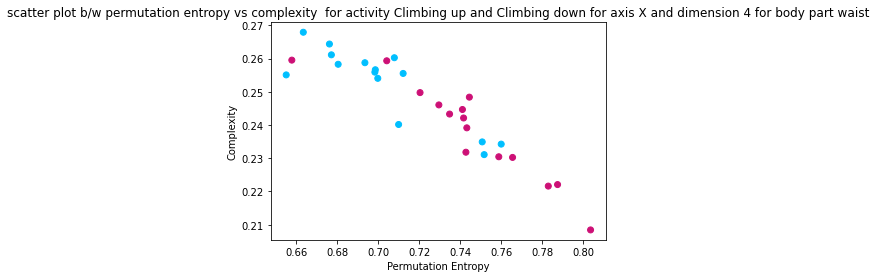

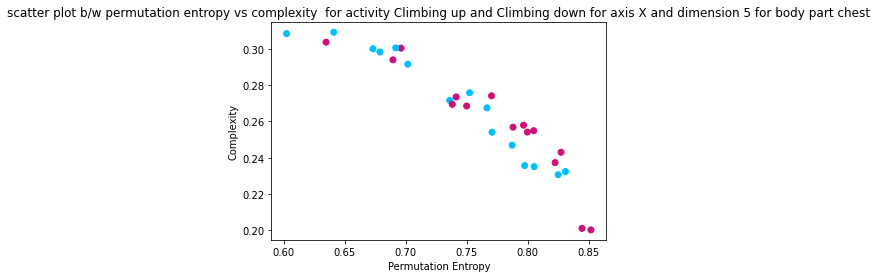

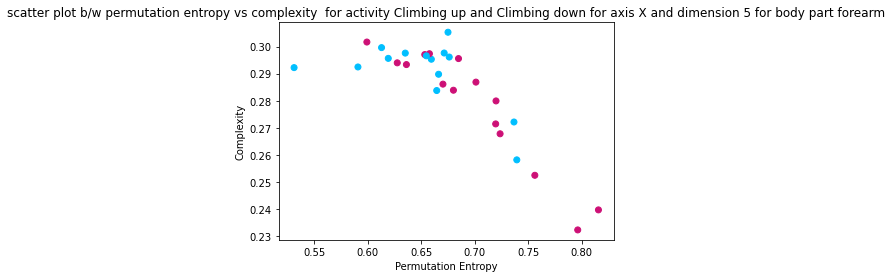

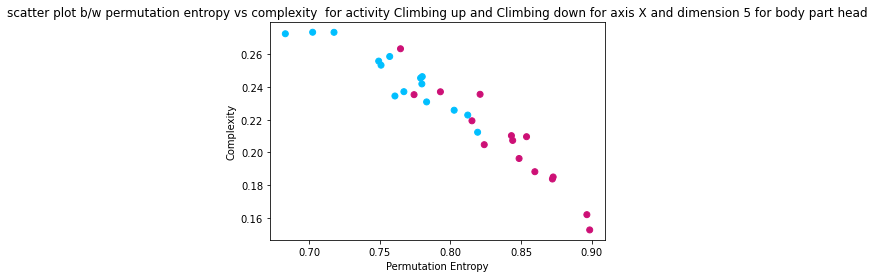

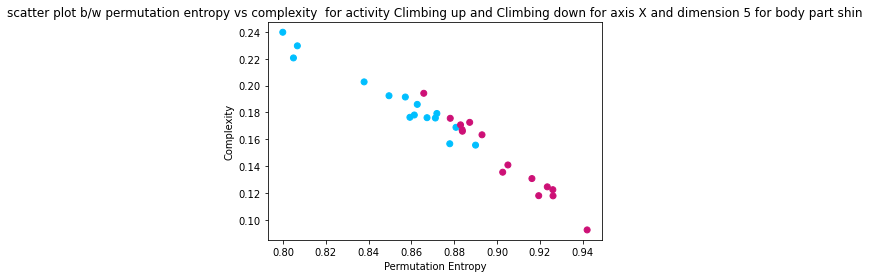

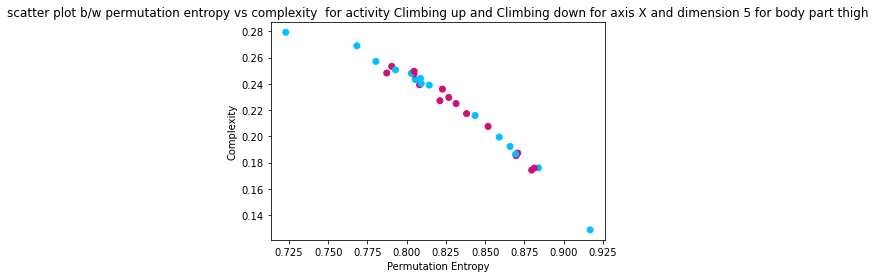

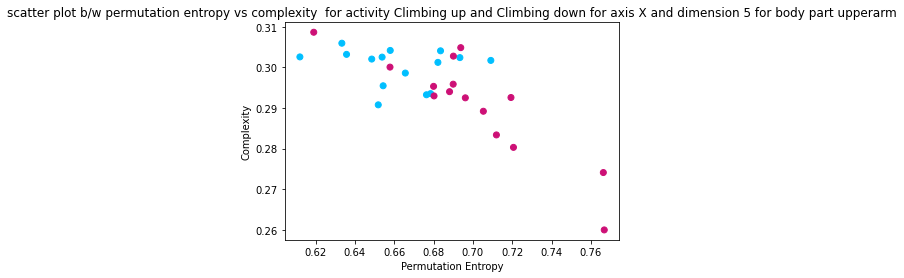

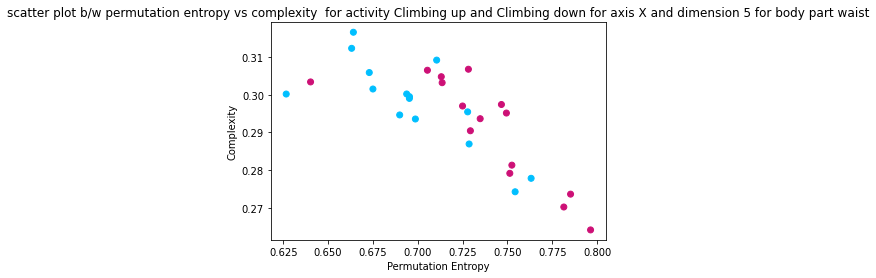

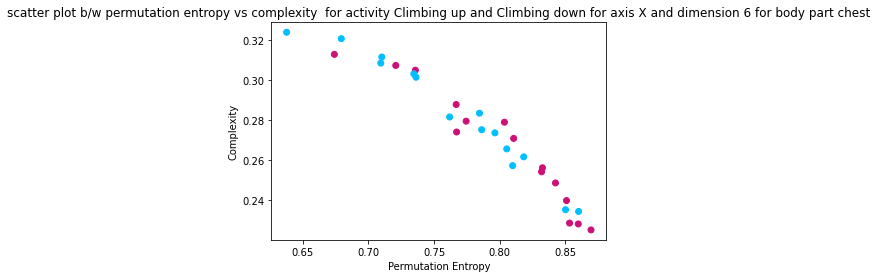

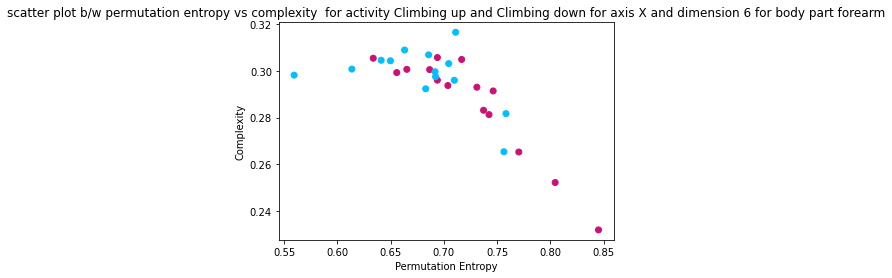

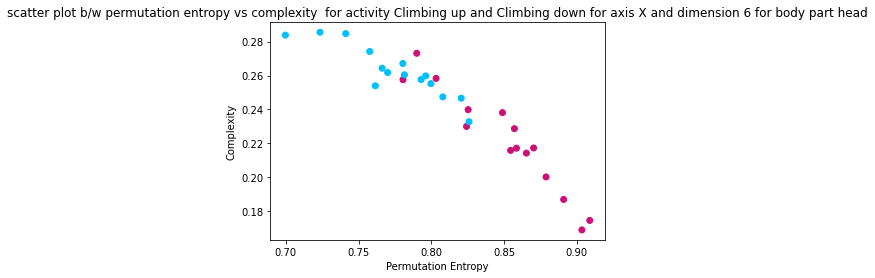

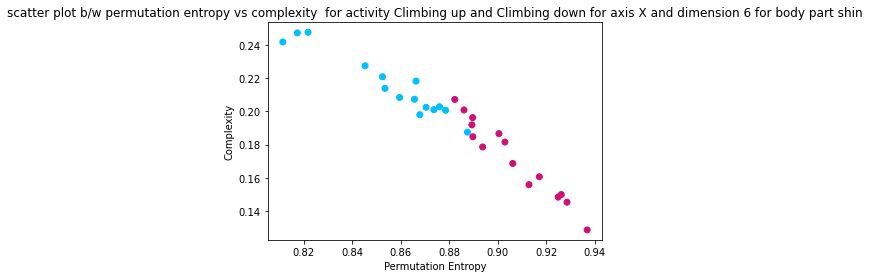

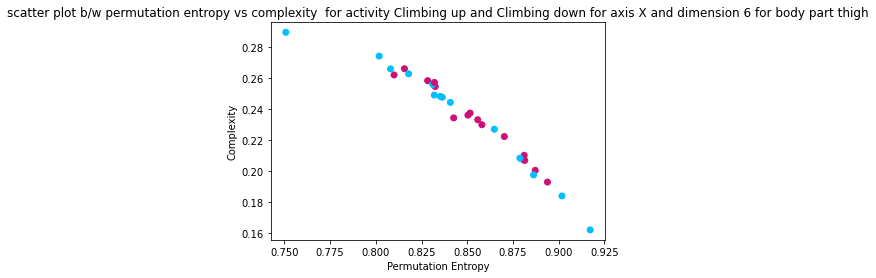

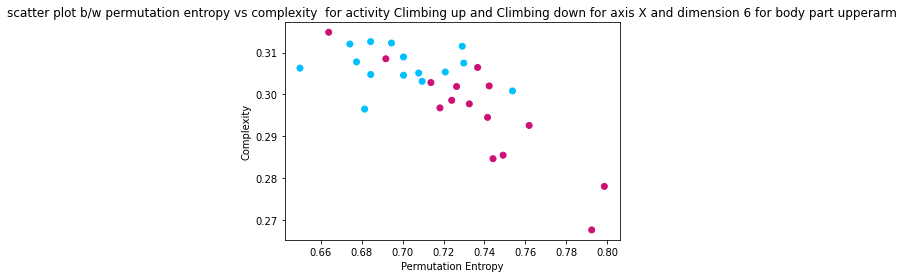

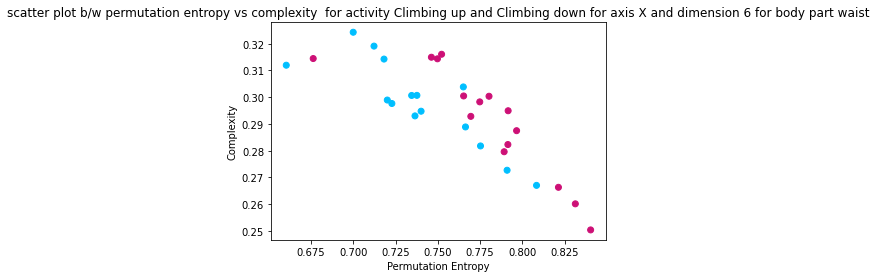

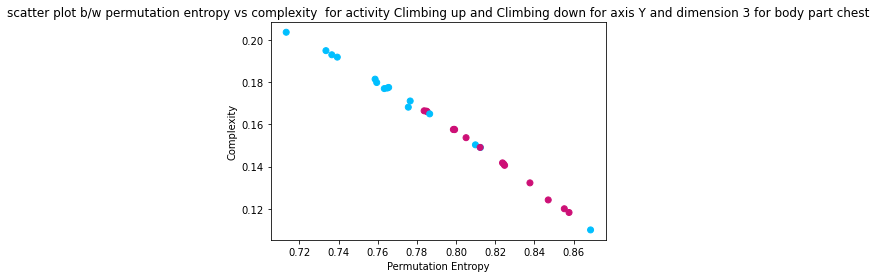

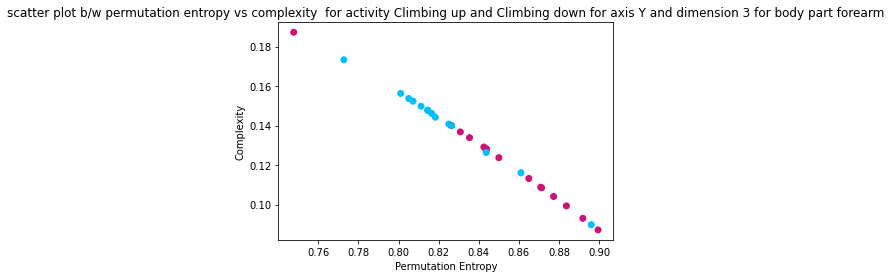

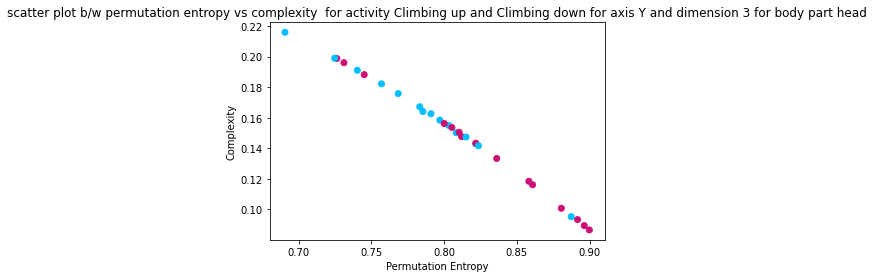

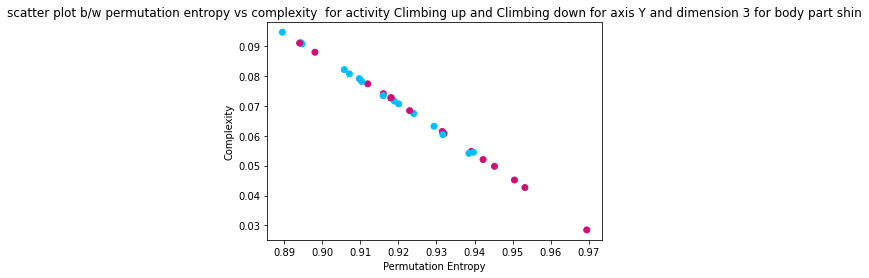

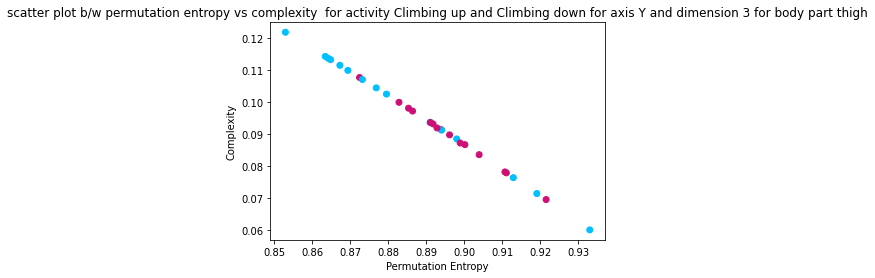

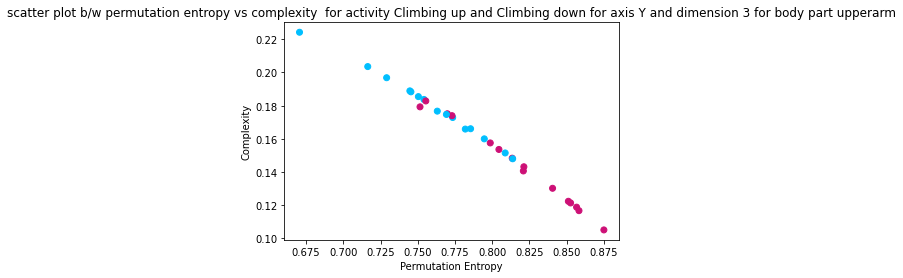

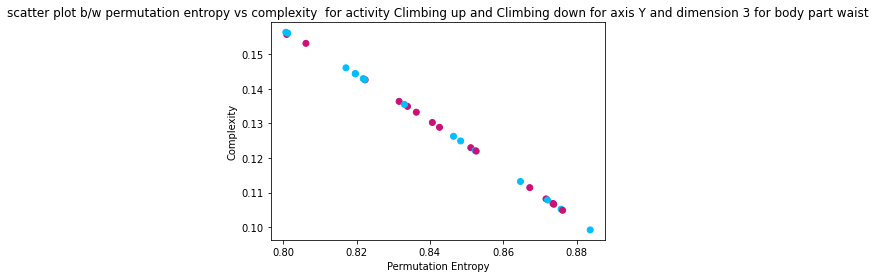

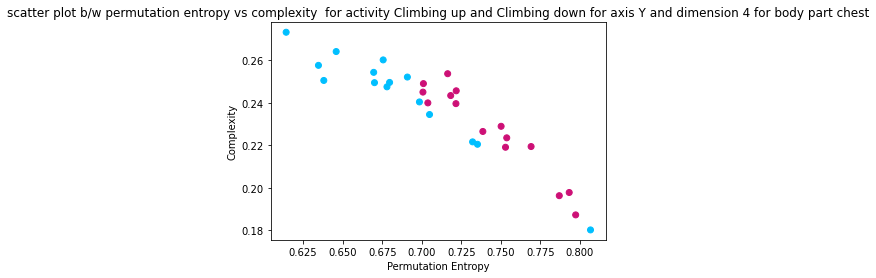

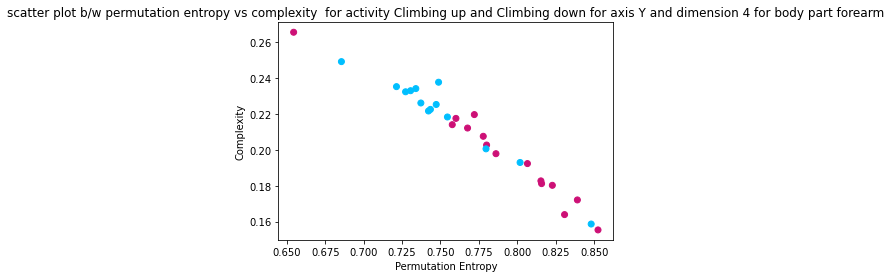

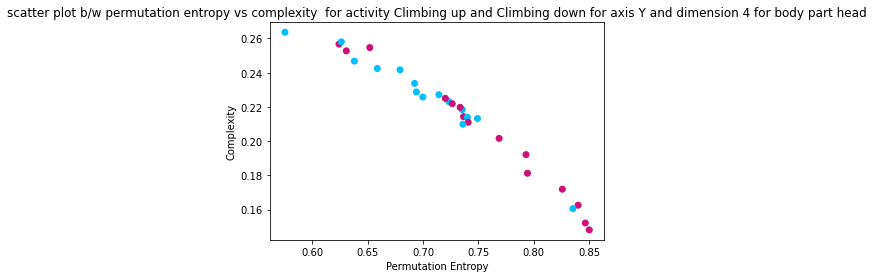

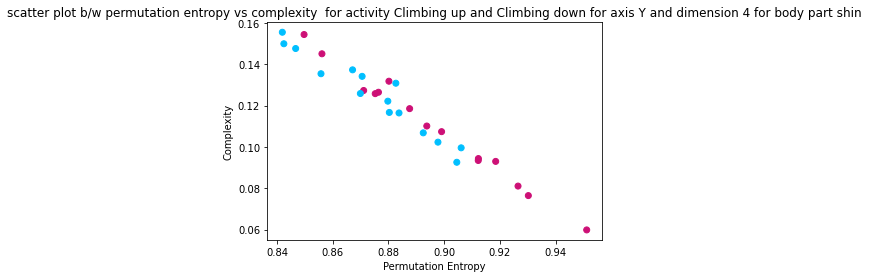

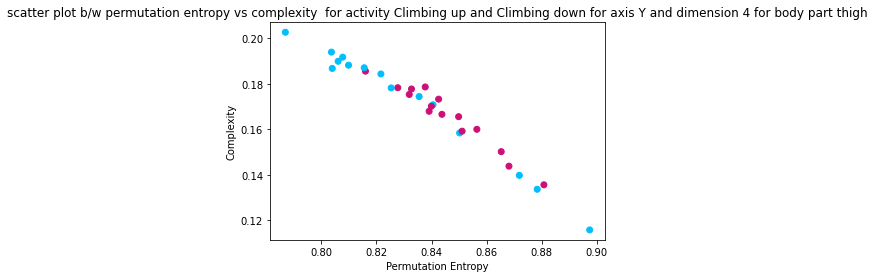

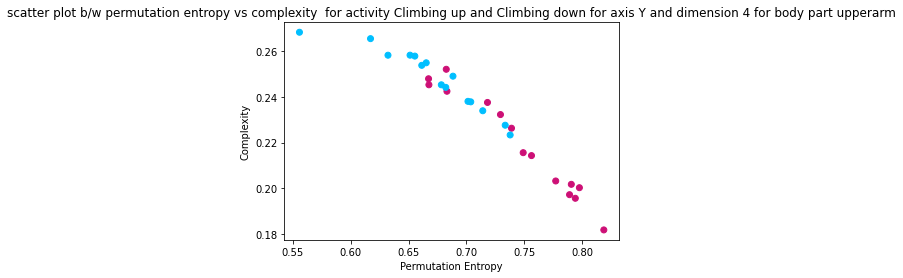

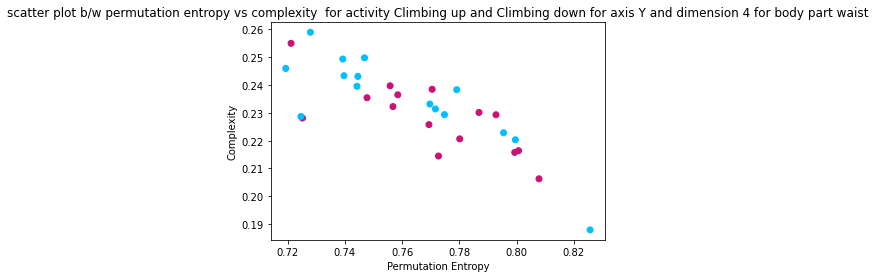

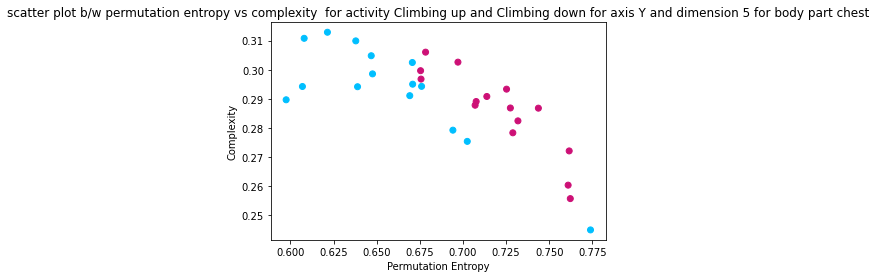

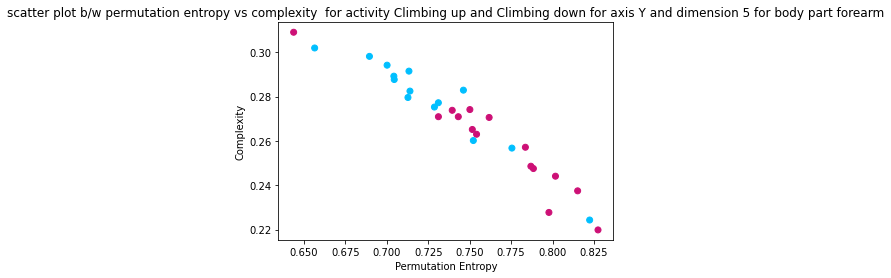

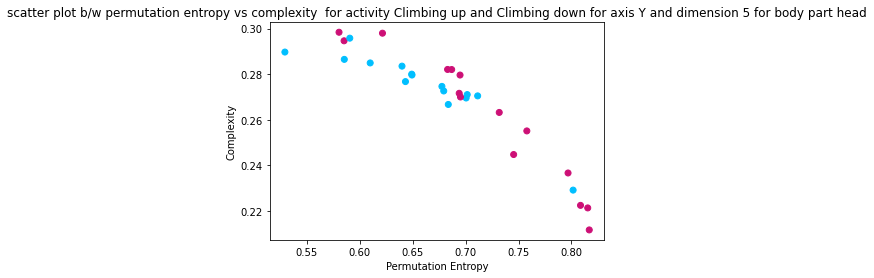

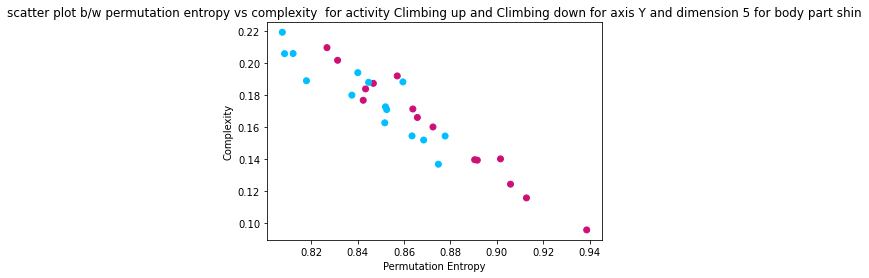

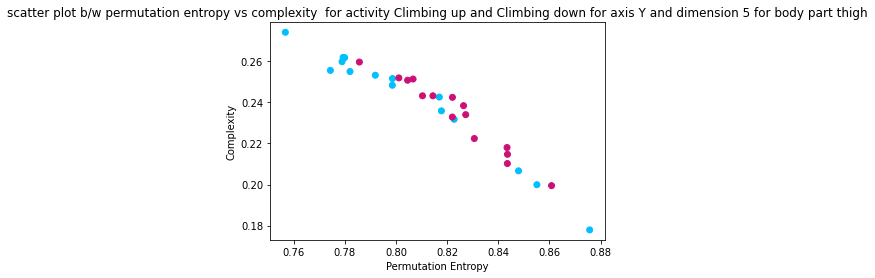

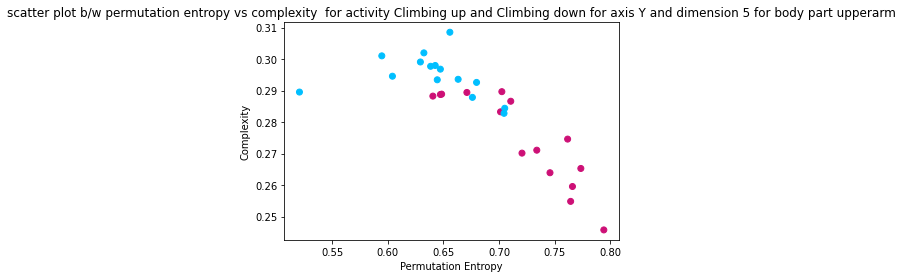

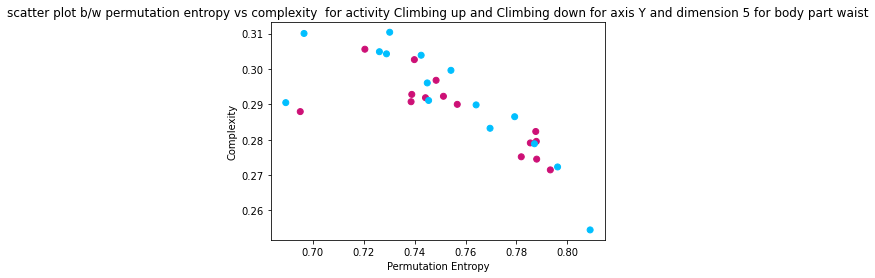

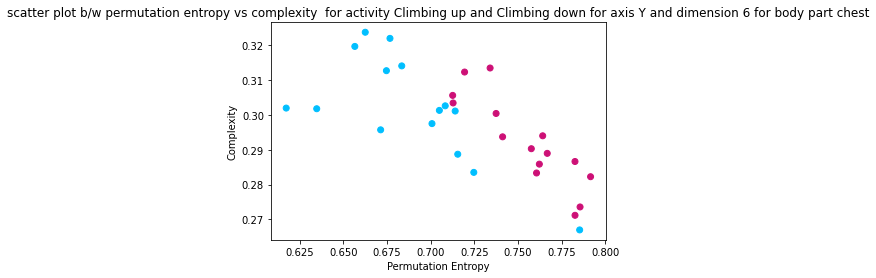

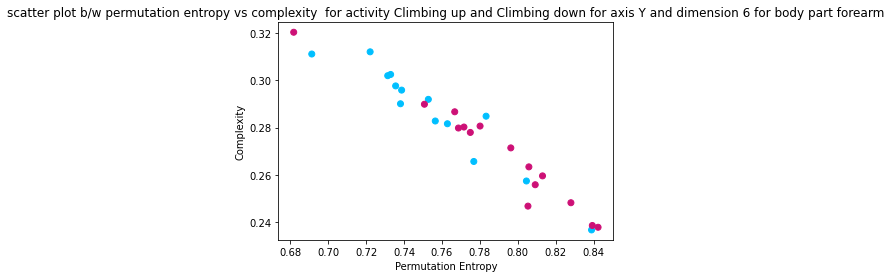

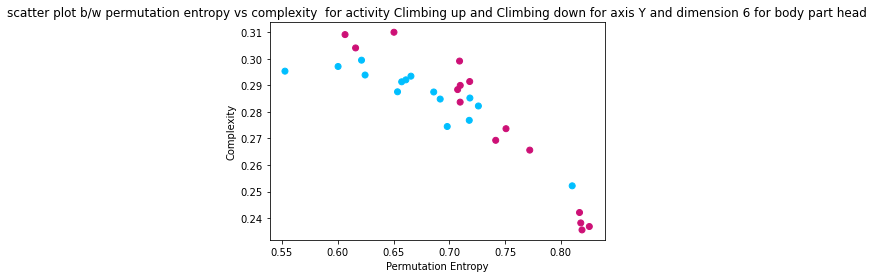

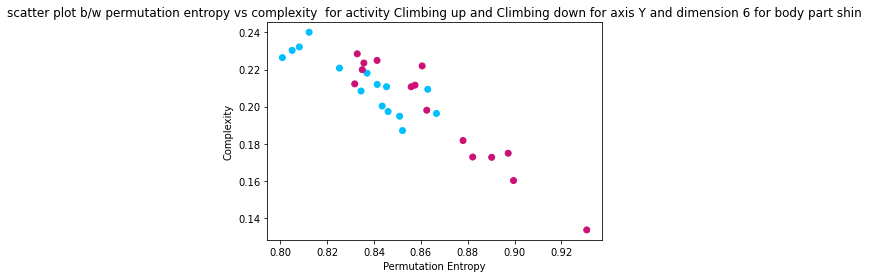

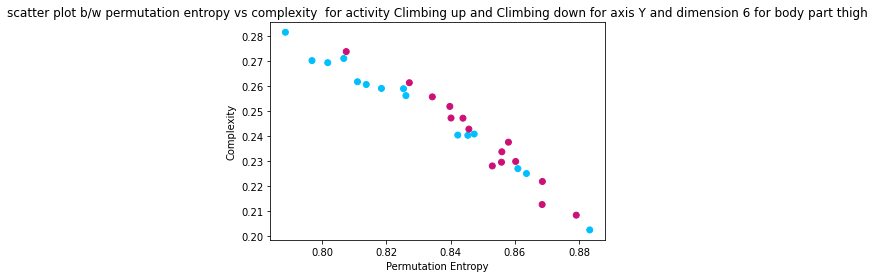

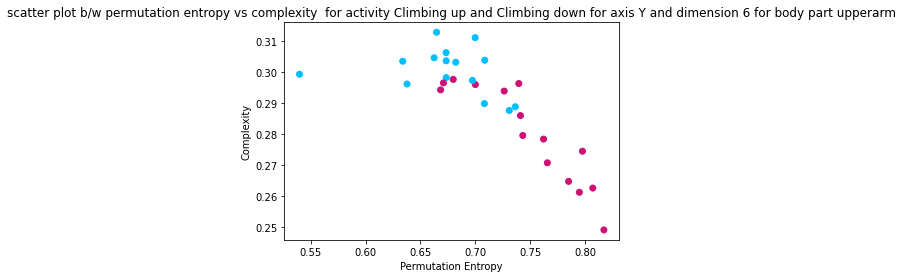

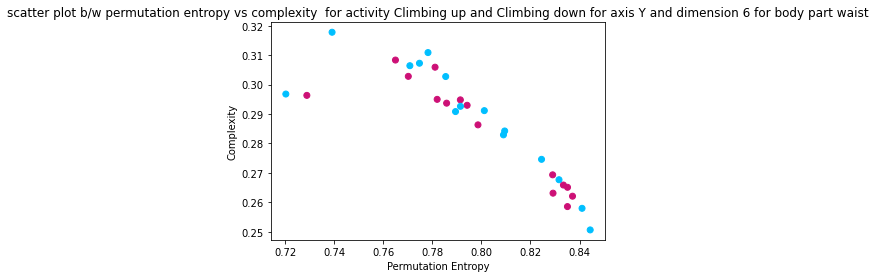

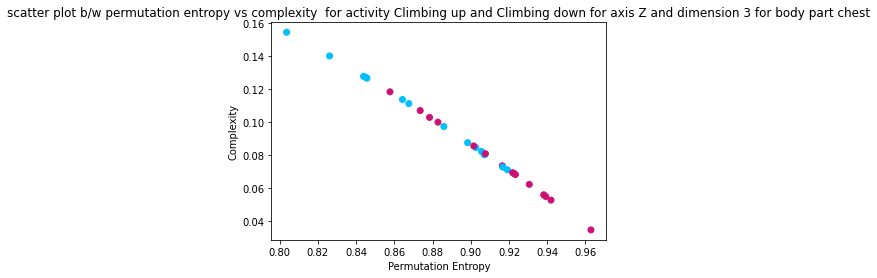

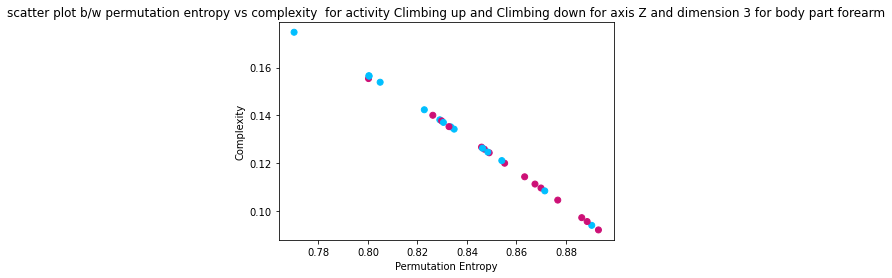

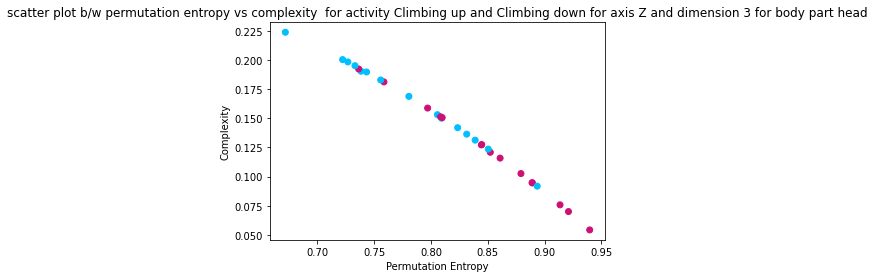

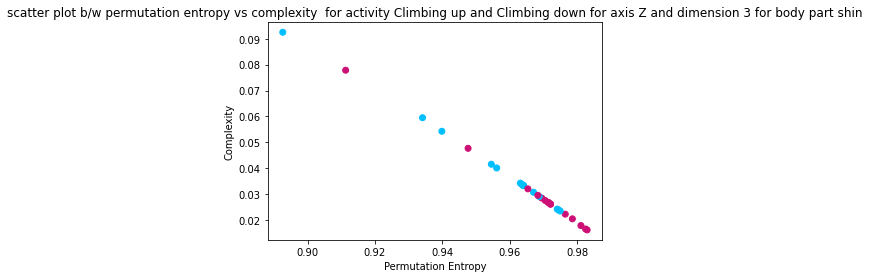

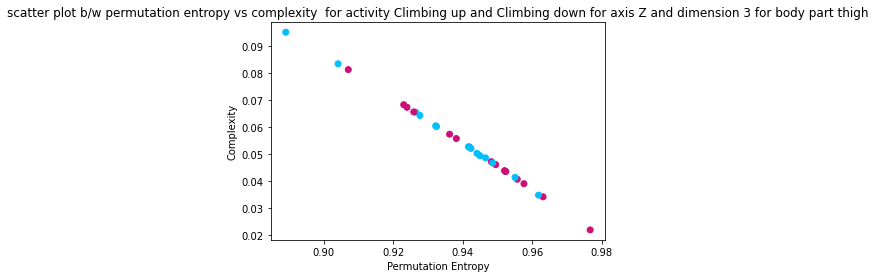

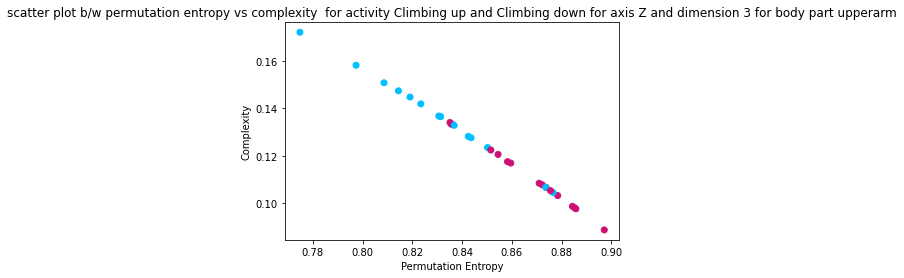

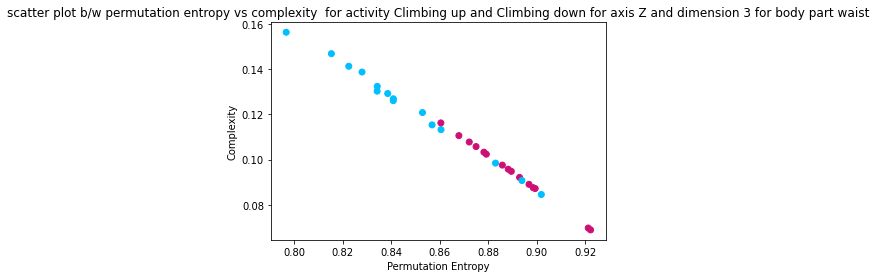

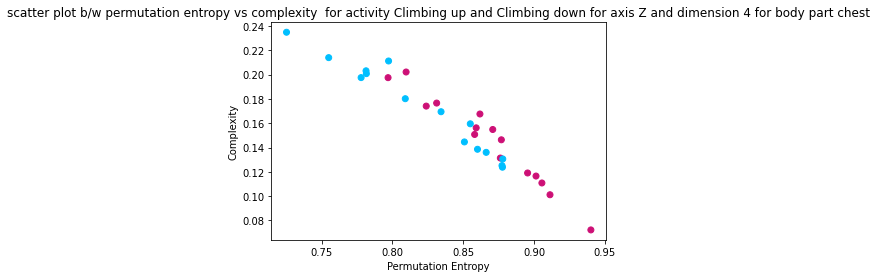

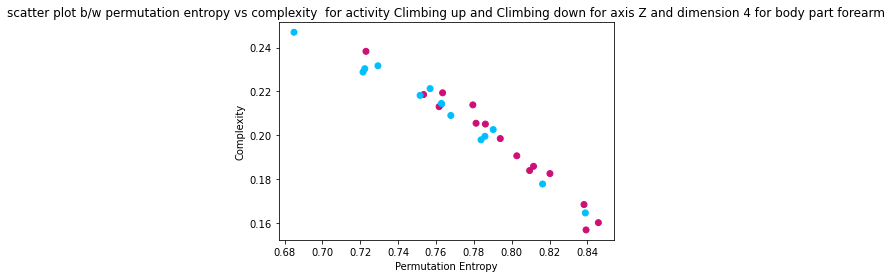

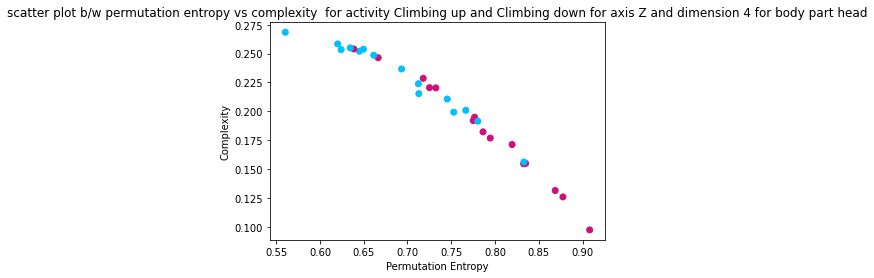

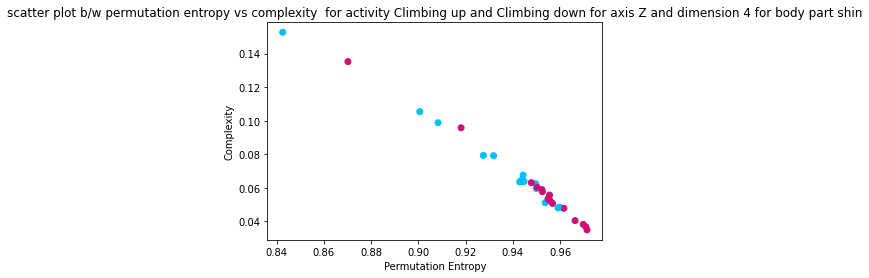

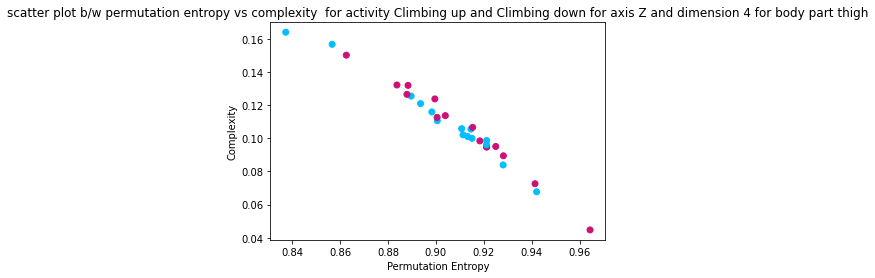

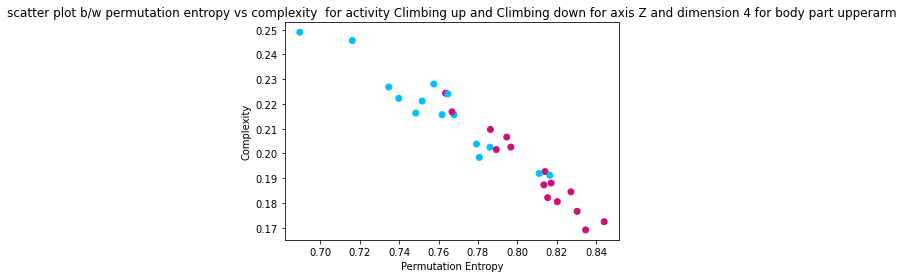

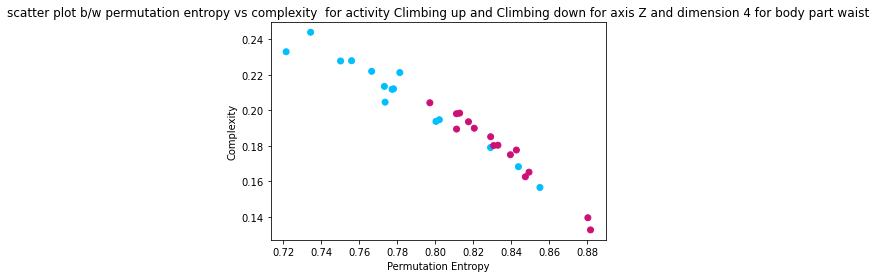

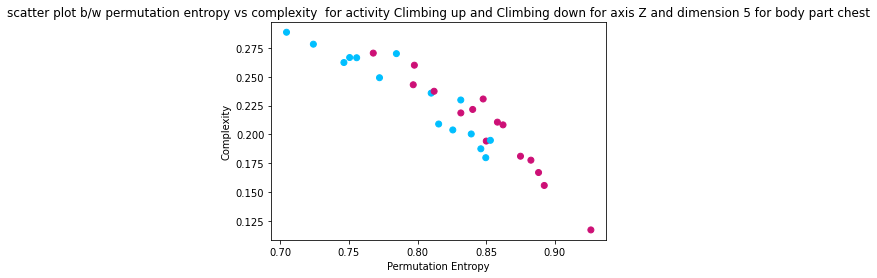

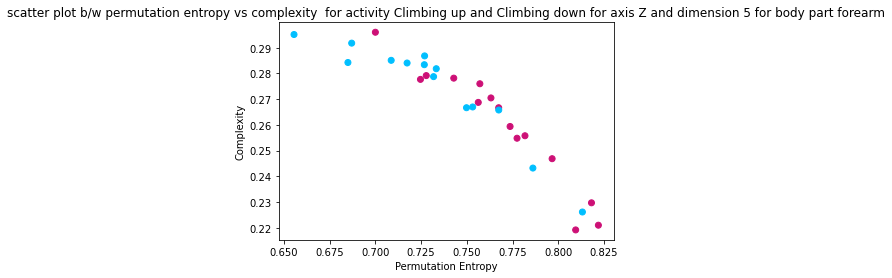

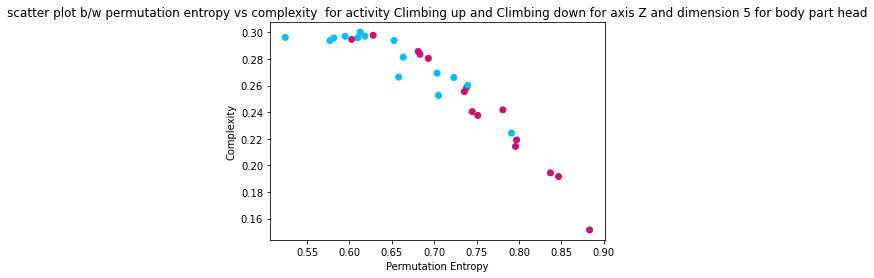

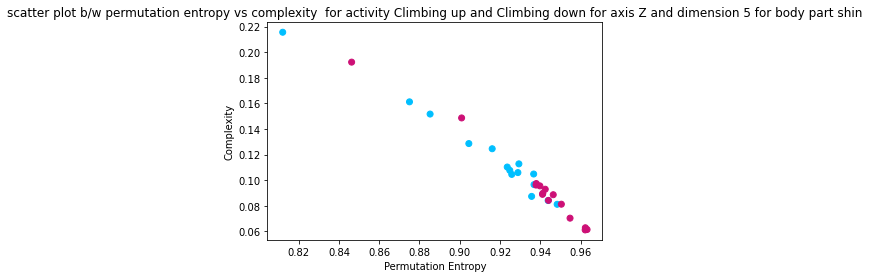

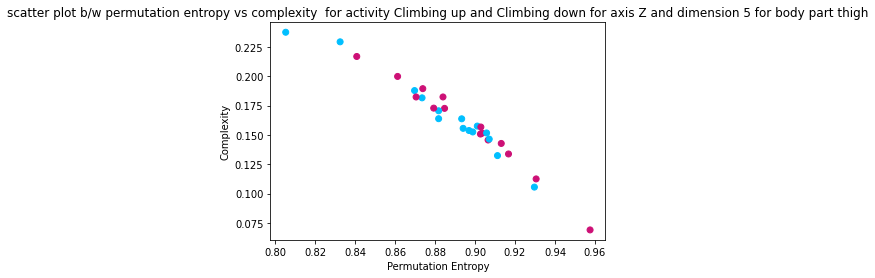

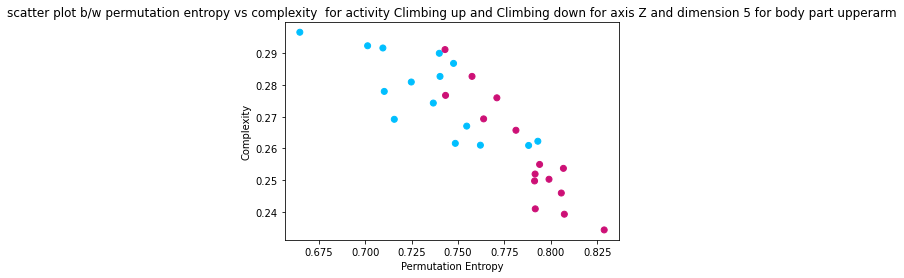

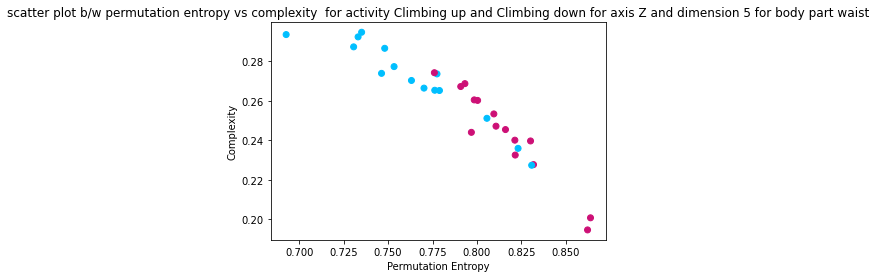

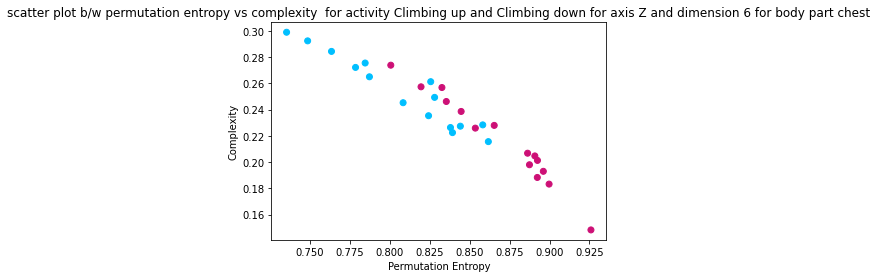

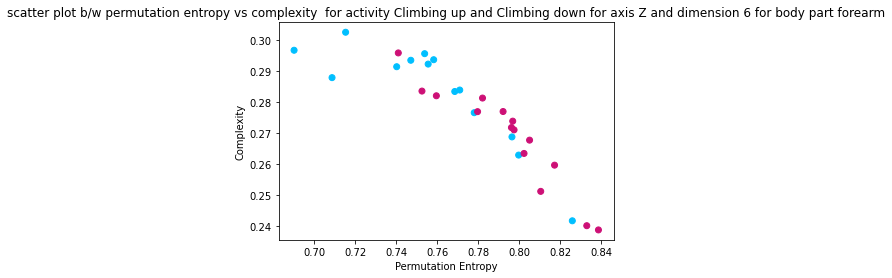

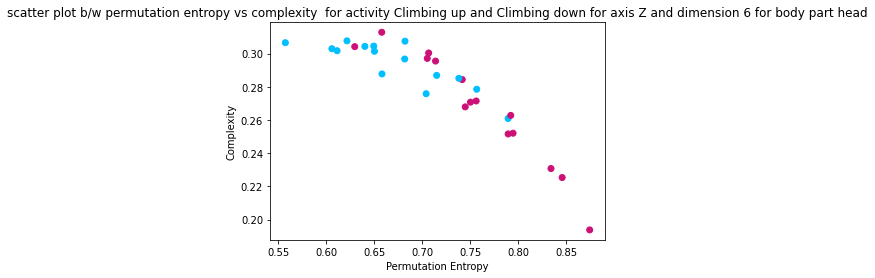

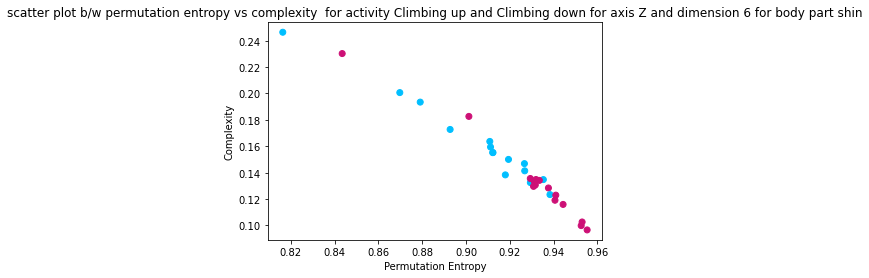

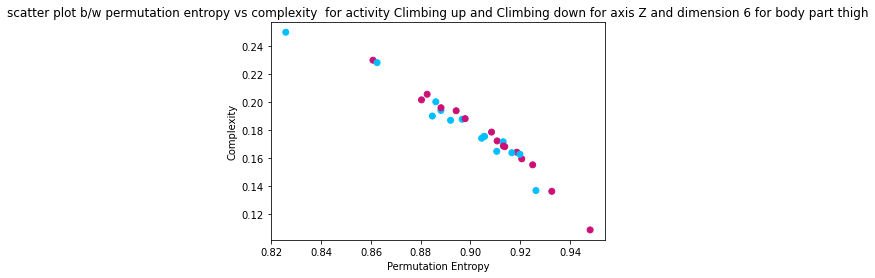

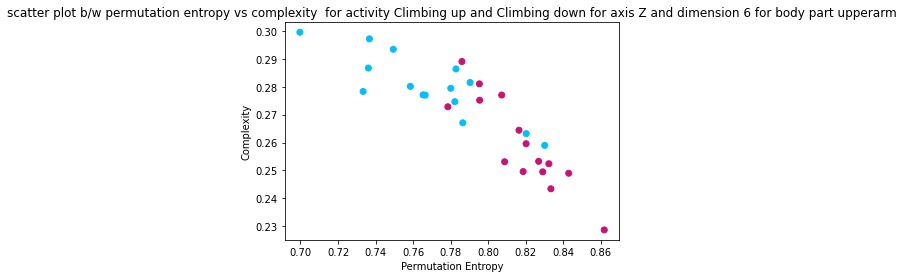

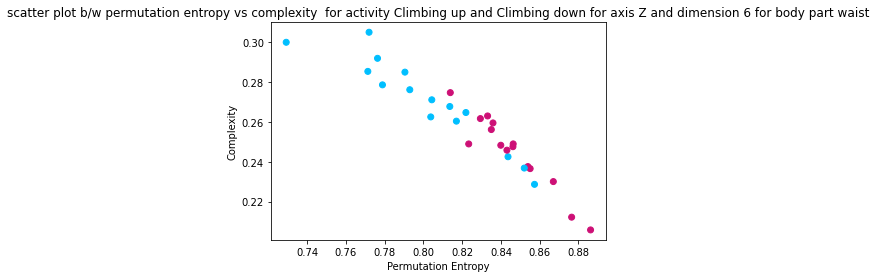

In [78]:
"""generating scatter plot b/w permutation entropy vs complexity  for activity Climbing up and Climbing down for axis and bodypart"""
scatter_plot_2 = final_table_2[((final_table_2['Activity'] == 'Climbing Down') | (final_table_2['Activity'] == 'Climbing Up')) & (final_table_2['Delay']== 1) & (final_table_2['Signal Length']== 4096)  ]
activities = ['Climbing Down','Climbing Up' ]
colors = dict(zip(activities, ["#CD1076", "#00BFFF"]))
axis = list("XYZ")
sensors = ["chest","forearm","head","shin","thigh","upperarm","waist"]
dimensions = [3, 4, 5, 6]

for ax in axis:
  for dimension in dimensions:
    for sensor in sensors:
      result_scatter2 = scatter_plot_2[(scatter_plot_2['Accelerometer Axis'] == ax) & (scatter_plot_2['Dimension'] == dimension) & (scatter_plot_2['Sensor'] == sensor)]
      title = 'scatter plot b/w permutation entropy vs complexity  for activity Climbing up and Climbing down for axis '+ str(ax)+ ' and dimension ' + str(dimension) + ' for body part '+str(sensor)
      scatterplot('Permutation Entropy', 'Complexity',result_scatter2['Activity'].map(colors), title, result_scatter2)